## Librerie necessarie

In [1]:
%pip install python-louvain
%pip install pandas
%pip install kagglehub
%pip install networkx
%pip install matplotlib


import os
import pandas as pd
import kagglehub
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## CARICAMENTO DATASET

In [21]:
# Simulazione del download del dataset Disney da un percorso locale
path = kagglehub.dataset_download("shivamb/disney-movies-and-tv-shows")
file_path = os.path.join(path, "disney_plus_titles.csv")

# Leggere il file CSV
df = pd.read_csv(file_path)

# Mostrare le prime righe del dataset per capire la struttura
df.head()


show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   

          date_added  release_year rating  duration  \
0  November 26, 2021          2016   TV-G    23 min   
1  November 26, 2021          1988     PG    91 min   
2  November 26, 2021          2011   TV-G    23 min   
3  November 26, 2021          2021  TV-PG    41 min   
4  November 25, 2021          2021    NaN  1 Season   

                       listed_in  \
0              Animation, Family   
1                         Comedy   
2      Animation, Comedy, Family   
3                        Musical   
4  Docuseries, Historical, Music   

                                         description  
0   Join Mickey and the gang as they duck the halls!  
1  Santa Claus passes his magic bag to a new St. ...  
2          Sid the Sloth is on Santa's naughty list.  
3               This is real life, not just fantasy!  
4  A three-part documentary from Peter Jackson ca...

## Creazione Grafo

In [3]:
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungiamo nodi e archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    
    # Verifica se la colonna 'cast' non è NaN prima di splittare
    if pd.notna(row['cast']):
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
        
        # Aggiungi il film/serie TV come nodo
        G.add_node(movie)
        
        # Aggiungi ciascun attore come nodo e un arco tra il film/serie e l'attore
        for actor in actors:
            G.add_node(actor.strip())  # Aggiungi l'attore come nodo
            G.add_edge(movie, actor.strip())  # Aggiungi un arco tra il film/serie e l'attore

# Stampa il numero di nodi e archi
print(f"Numero di nodi: {G.number_of_nodes()}")
print(f"Numero di archi: {G.number_of_edges()}")

Numero di nodi: 5014
Numero di archi: 5899


**Densità del grafo**

In [23]:
# Densità della rete
density = nx.density(G)
print(f"Densità della rete: {density:.4f}")

Densità della rete: 0.0007


## Analisi della struttura del grafo

In [ ]:
# Verifica se il grafo è connesso
if nx.is_connected(G):
    # Se il grafo è connesso, calcola il diametro e la distanza media
    diameter = nx.diameter(G)
    print(f"Diametro della rete: {diameter}")

    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print(f"Distanza media tra i nodi: {avg_shortest_path_length}")

else:
    # Se il grafo non è connesso, calcola per ogni componente connessa separatamente
    components = list(nx.connected_components(G))
    print(f"Numero di componenti connesse: {len(components)}")

    for i, component in enumerate(components):
        subgraph = G.subgraph(component)
        
        # Calcola il diametro per ogni componente
        component_diameter = nx.diameter(subgraph)
        print(f"Diametro del componente {i+1}: {component_diameter}")
        
        # Calcola la distanza media per ogni componente
        if len(component) > 1:  # Evita errore per componenti con un solo nodo
            component_avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
            print(f"Distanza media tra i nodi nel componente {i+1}: {component_avg_shortest_path_length}")
        else:
            print(f"Componente {i+1} con un solo nodo, nessuna distanza media.")


## Visualizzazione componente connessa più grande della rete

Numero di nodi (componente connessa più grande): 3755
Numero di archi (componente connessa più grande): 4912


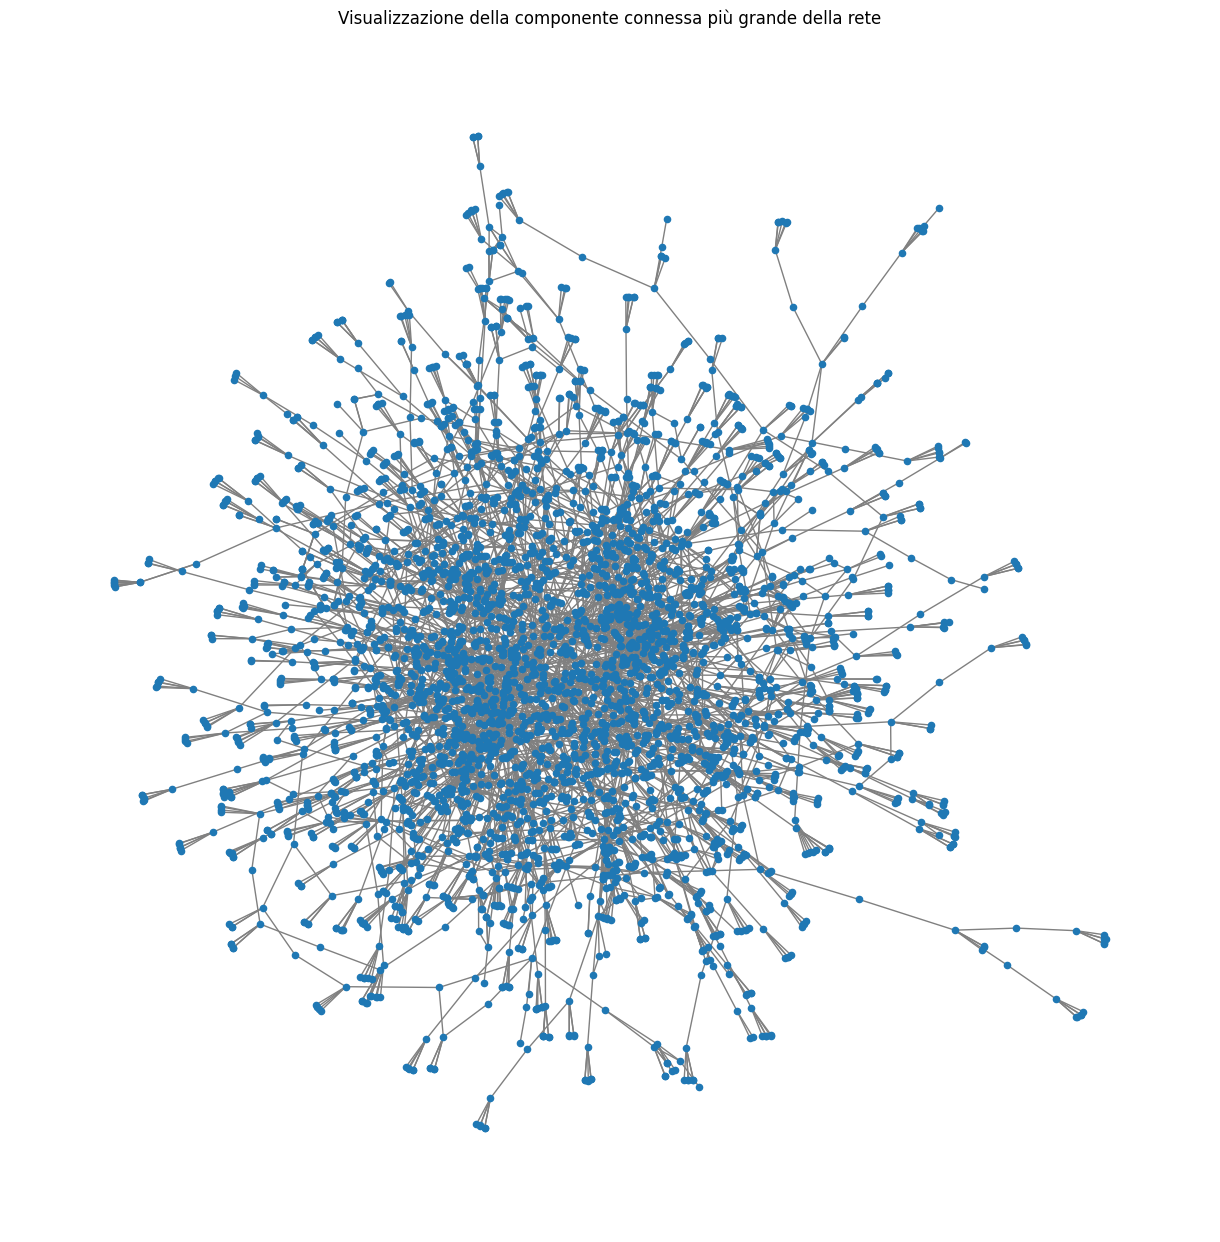

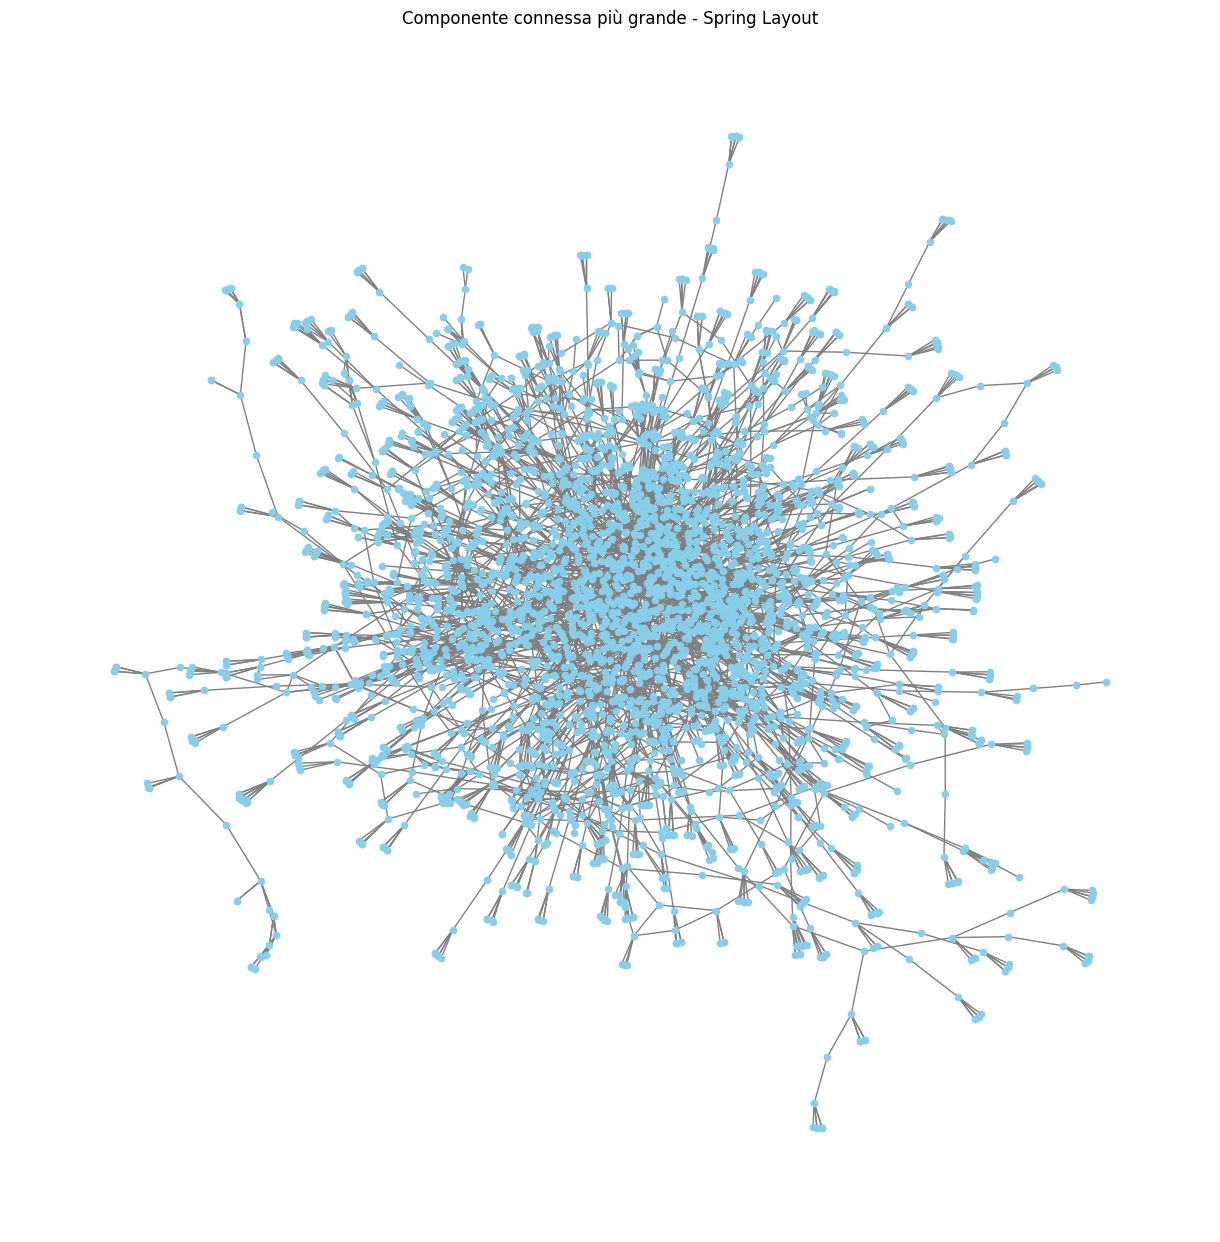

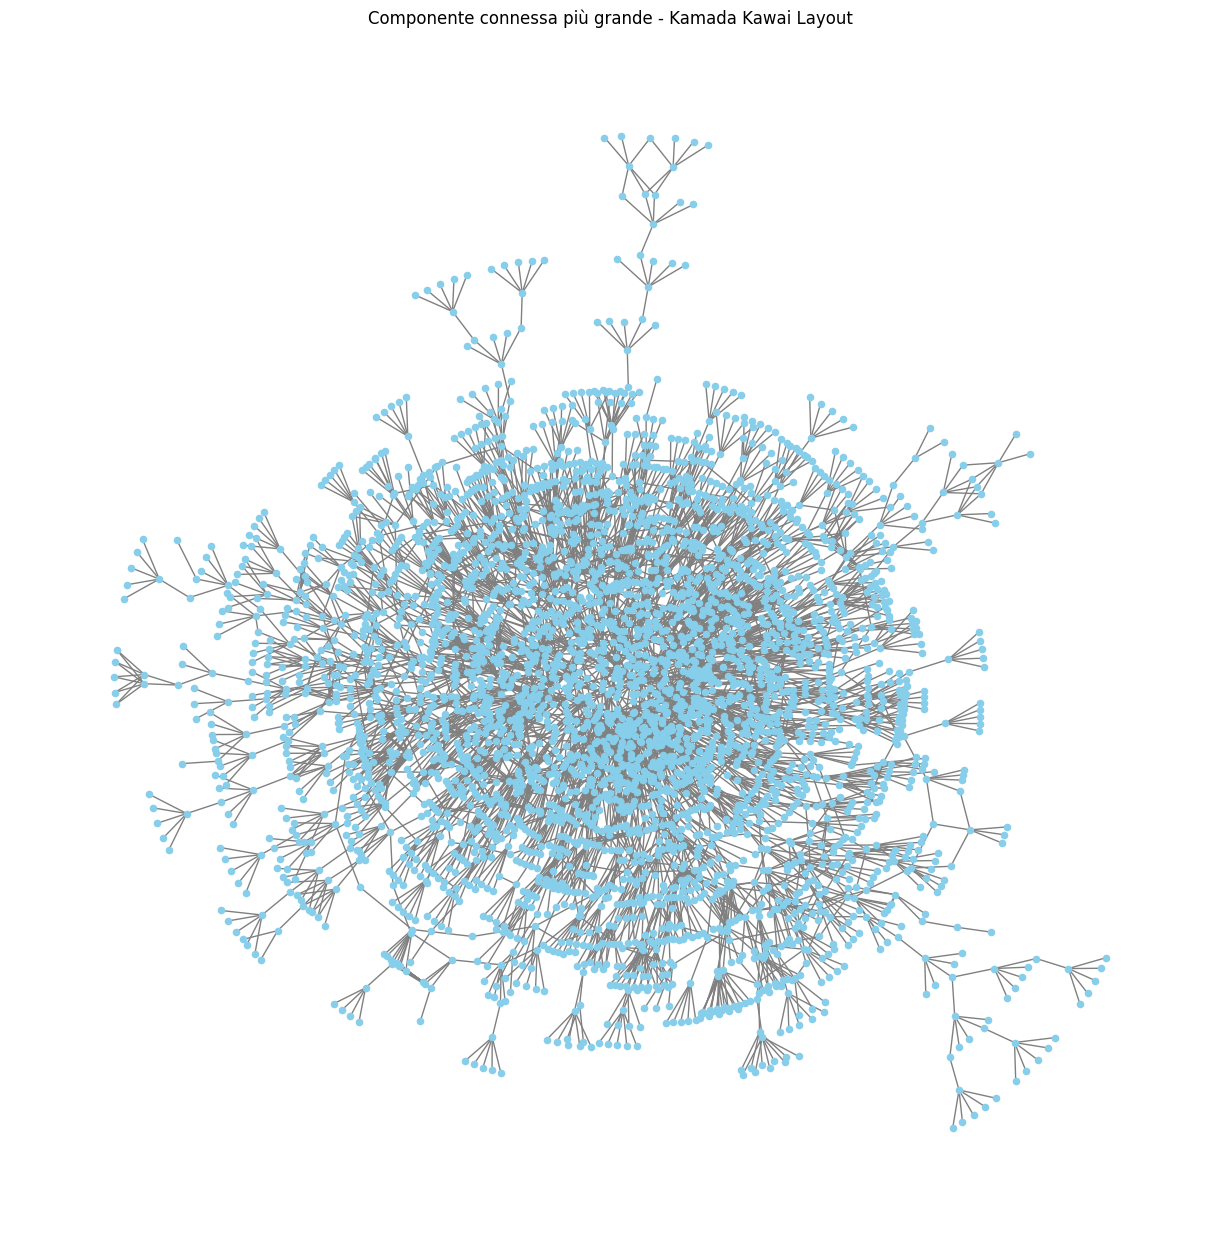

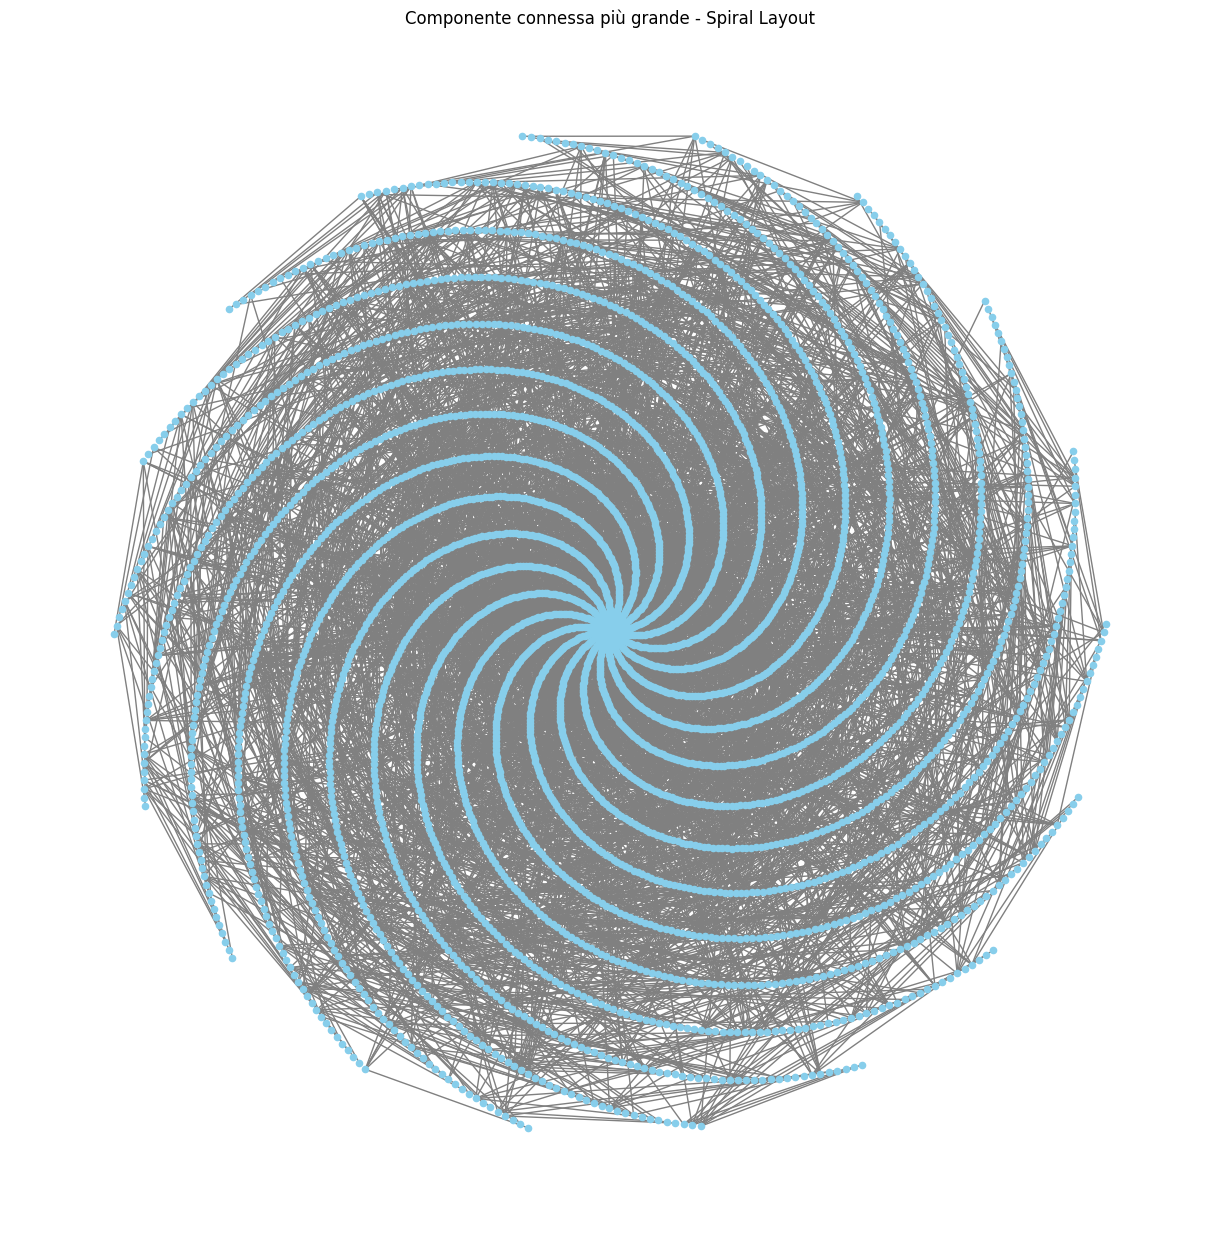

In [16]:
# Crea un grafo vuoto
G = nx.Graph()

# Aggiungiamo nodi e archi
for index, row in df.iterrows():
    movie = row['title']  # Usa la colonna 'title' per i titoli
    
    # Verifica se la colonna 'cast' non è NaN prima di splittare
    if pd.notna(row['cast']):
        actors = row['cast'].split(',')  # Usa la colonna 'cast' per gli attori, separati da virgola
        
        # Aggiungi il film/serie TV come nodo
        G.add_node(movie)
        
        # Aggiungi ciascun attore come nodo e un arco tra il film/serie e l'attore
        for actor in actors:
            G.add_node(actor.strip())  # Aggiungi l'attore come nodo
            G.add_edge(movie, actor.strip())  # Aggiungi un arco tra il film/serie e l'attore

# Trova la componente connessa più grande
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Stampa il numero di nodi e archi della componente connessa più grande
print(f"Numero di nodi (componente connessa più grande): {G.number_of_nodes()}")
print(f"Numero di archi (componente connessa più grande): {G.number_of_edges()}")

# Visualizzazione della componente connessa più grande del grafo
plt.figure(figsize=(12, 12))
nx.draw(G, node_size=20, edge_color='gray', with_labels=False)
plt.title("Visualizzazione della componente connessa più grande della rete")
plt.show()

# Layout diversi per la componente connessa più grande
layouts = {
    "Spring Layout": nx.spring_layout(G),
    "Kamada Kawai Layout": nx.kamada_kawai_layout(G),
    "Spiral Layout": nx.spiral_layout(G)
}

# Visualizzazione della componente connessa più grande con i layout
for name, pos in layouts.items():
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_size=20, edge_color='gray', with_labels=False, node_color='skyblue')
    plt.title(f"Componente connessa più grande - {name}")
    plt.show()



## Cosa scrivere nel latex fino a questo punto
- Struttura del Grafo:
Numero di nodi e archi: Il dataset contiene 5014 nodi (film, serie TV e attori) e 5899 archi (connessioni tra film/serie e attori).

- Componente connessa più grande:
La rete è frammentata, ma la componente connessa più grande contiene 3755 nodi e 4912 archi, quindi rappresenta una parte significativa della rete.

- Densità del Grafo:
La densità è molto bassa (0.0007), il che indica che la rete è estremamente sparsa, un risultato atteso per un grafo bipartito grande.

- Connettività:
La componente connessa più grande suggerisce che ci sono film/serie TV che fungono da "hub" principali, collegando molti attori.

- Visualizzazioni:
I layout diversi mostrano una rete con un nucleo centrale denso e diverse connessioni periferiche. Questo suggerisce la presenza di film o serie TV con cast ampi che connettono più attori.

## Analisi della centralità

In [30]:
# Centralità per grado
degree_centrality = nx.degree_centrality(G)

# Centralità di betweenness
betweenness_centrality = nx.betweenness_centrality(G)

# Centralità di closeness
closeness_centrality = nx.closeness_centrality(G)

# Centralità di eigenvector
eigenvector_centrality = nx.eigenvector_centrality(G)

# Visualizza i 10 nodi più centrali per ogni tipo di centralità
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodi per grado di centralità:", top_degree)
print("Top 10 nodi per centralità di betweenness:", top_betweenness)
print("Top 10 nodi per centralità di closeness:", top_closeness)
print("Top 10 nodi per centralità di eigenvector:", top_eigenvector)


Top 10 nodi per grado di centralità: [('Jim Cummings', 0.008790623335109216), ('Walt Disney', 0.005327650506126798), ('Larry the Cable Guy', 0.005061267980820458), ('Bill Farmer', 0.004794885455514118), ('Tress MacNeille', 0.004262120404901438), ('Corey Burton', 0.004262120404901438), ('Keith Ferguson', 0.004262120404901438), ('Bob Peterson', 0.003995737879595098), ('Jeff Bennett', 0.003995737879595098), ('Pinto Colvig', 0.003995737879595098)]
Top 10 nodi per centralità di betweenness: [('Jim Cummings', 0.1528739978607631), ('Jeff Bennett', 0.07642691659745694), ('Corey Burton', 0.06234621524483089), ('Gnomeo & Juliet', 0.06233842190549574), ('Wallace Shawn', 0.05922733502459723), ('Russi Taylor', 0.051793548698262706), ('Brenda Song', 0.04888974000321363), ('Get a Horse!', 0.048738488420596394), ('Stephen Tobolowsky', 0.047289991071807425), ('Raven-Symoné', 0.047244657903336144)]
Top 10 nodi per centralità di closeness: [('Jim Cummings', 0.14176201805067784), ('Jeff Bennett', 0.134846

## Osservazioni Generali
- Dominanza di Jim Cummings:
È il nodo centrale per tutte le metriche di centralità, dimostrando il suo ruolo predominante come attore nella rete Disney.
Può essere considerato un "supernodo", cioè un attore chiave che connette molte altre entità nella rete.

- Film Centrali:
Titoli come Gnomeo & Juliet, Get a Horse!, e A Goofy Movie appaiono in più metriche di centralità, suggerendo che sono film chiave per la rete Disney, probabilmente con cast ricorrenti.

- Pattern di Connettività:
Nodi come Walt Disney mostrano un'importanza storica (associato a molti film), mentre i nodi più recenti (es. "Disney Mickey Mouse Clubhouse") indicano cluster più moderni o franchise specifici.

## Grafichiamo la distribuzione delle centralità

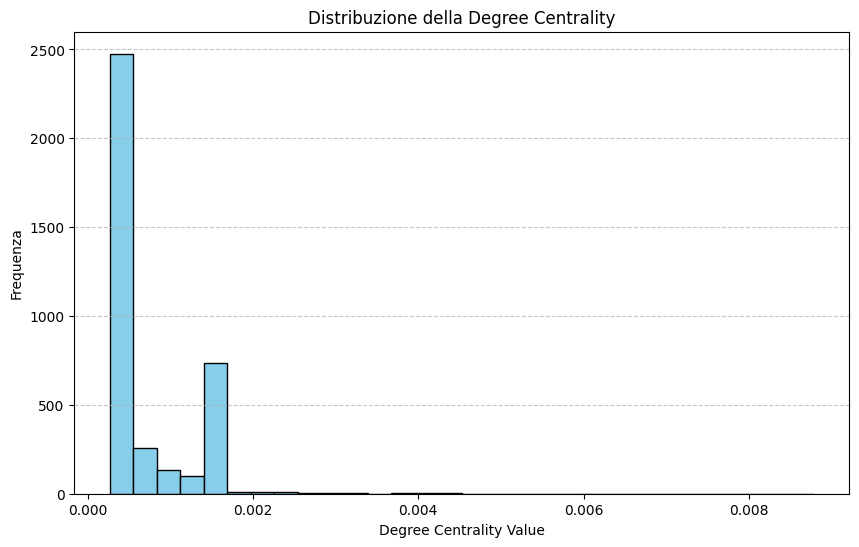

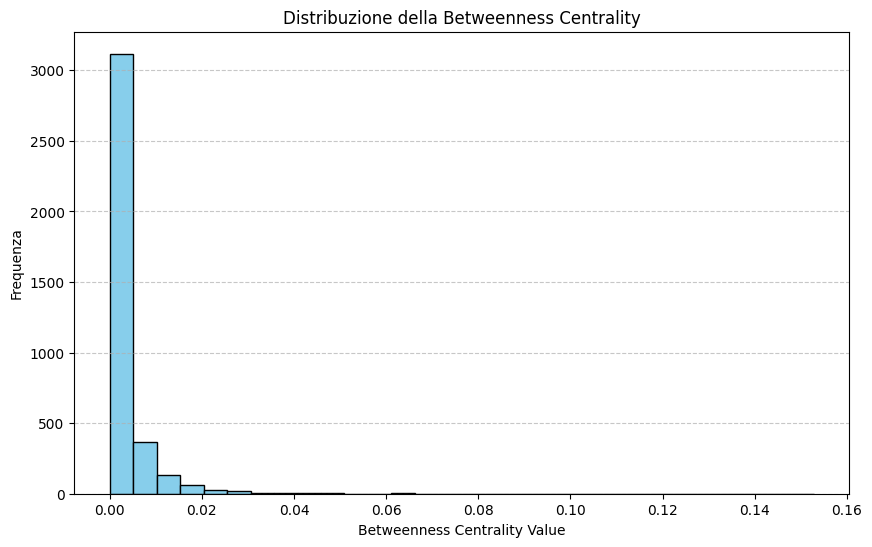

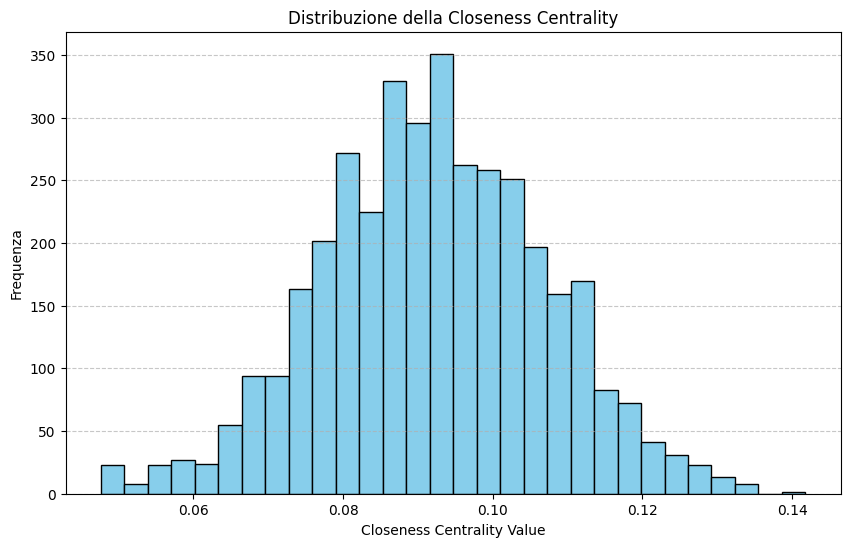

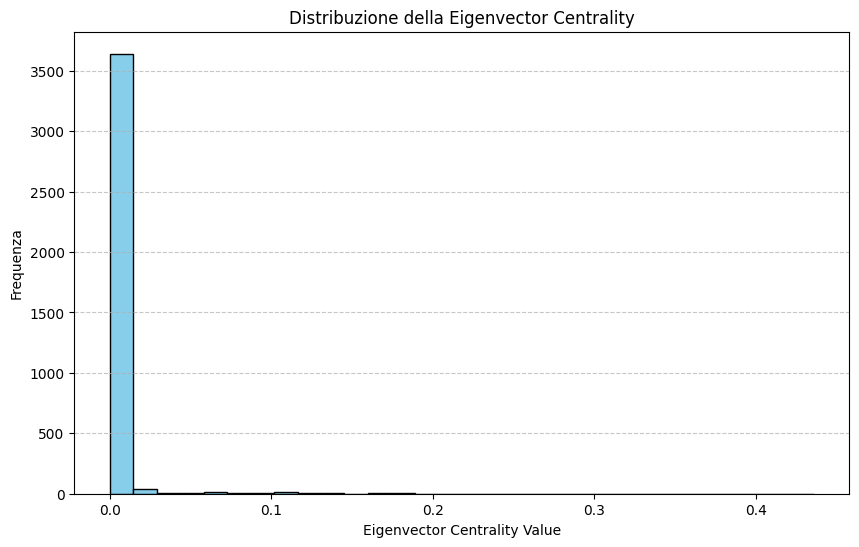

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

# Calcolo delle centralità
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Distribuzione delle centralità
centralities = {
    "Degree Centrality": degree_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Closeness Centrality": closeness_centrality,
    "Eigenvector Centrality": eigenvector_centrality
}

# Visualizzazione delle distribuzioni
for centrality_name, centrality_values in centralities.items():
    plt.figure(figsize=(10, 6))
    plt.hist(centrality_values.values(), bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribuzione della {centrality_name}")
    plt.xlabel(f"{centrality_name} Value")
    plt.ylabel("Frequenza")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


**Conclusioni**
- Distribuzione Sparsa:
La rete è altamente sparsa, con la maggior parte dei nodi aventi valori bassi in tutte le centralità. Tuttavia, pochi nodi chiave (attori o film) fungono da hub principali.

- Ruolo dei Supernodi:
Jim Cummings domina tutte le metriche di centralità, evidenziando il suo ruolo fondamentale nella rete Disney. Altri nodi, come Bill Farmer o film come Gnomeo & Juliet, hanno ruoli secondari ma cruciali come connettori.

- Pattern di Collaborazione:
Gli attori con alta betweenness probabilmente lavorano in franchise che collegano diverse comunità di film.

## Analisi della comunità

Numero di comunità trovate: 54
Dimensioni delle comunità: [216, 208, 157, 126, 119, 109, 107, 106, 102, 101, 100, 99, 95, 91, 90, 87, 87, 86, 85, 81, 81, 69, 67, 67, 67, 63, 61, 60, 58, 58, 58, 55, 54, 54, 52, 51, 49, 49, 47, 44, 41, 41, 39, 38, 32, 25, 24, 23, 18, 16, 12, 11, 10, 9]


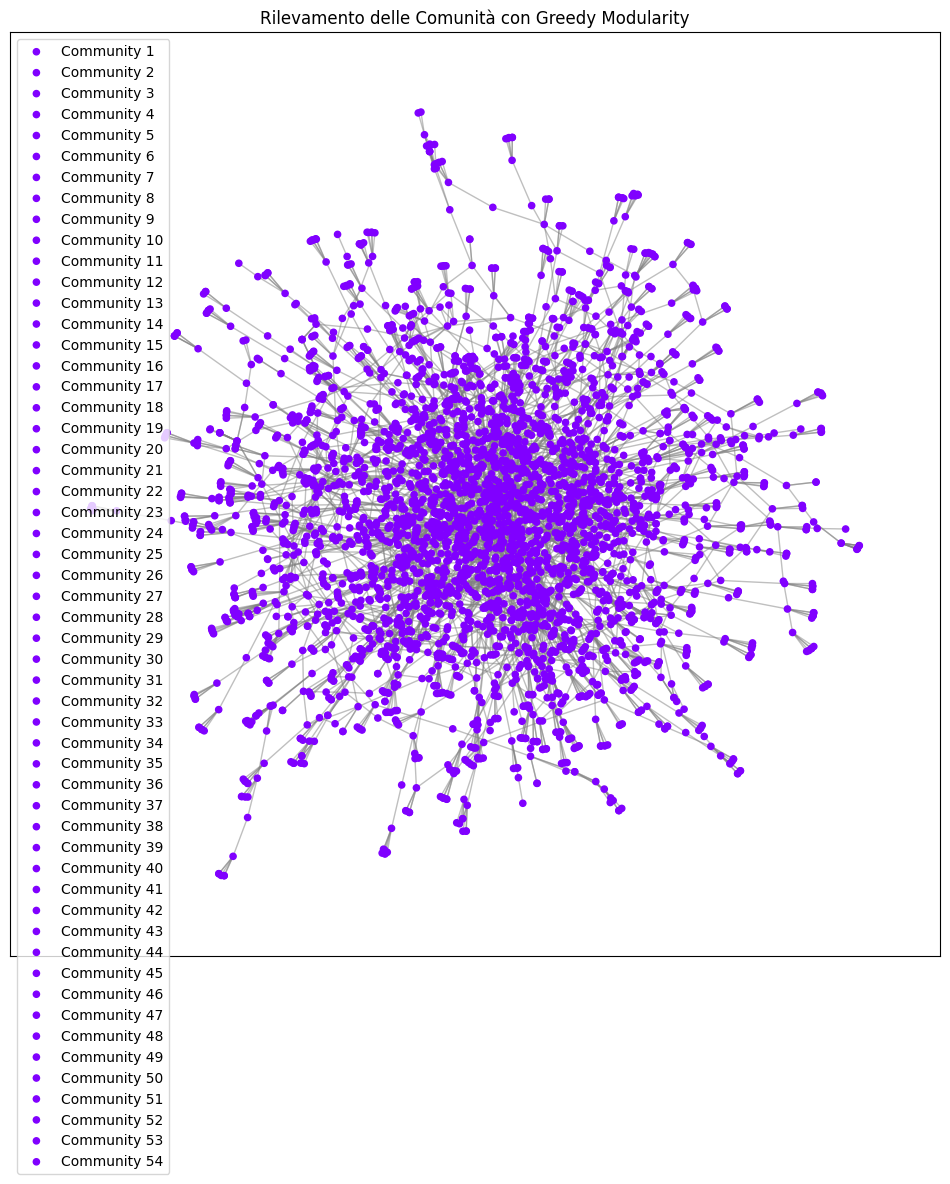

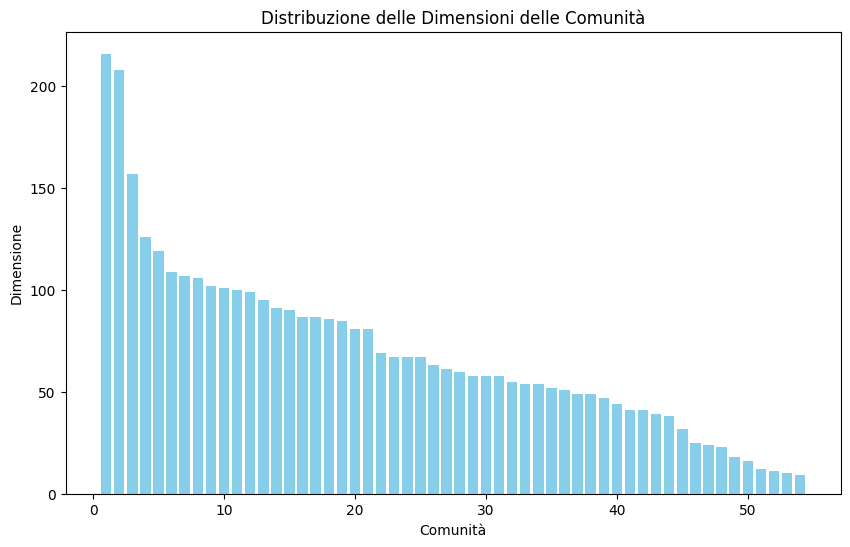

In [18]:
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

# Rilevamento delle comunità con Greedy Modularity
communities = list(greedy_modularity_communities(G))

# Analisi delle comunità
print(f"Numero di comunità trovate: {len(communities)}")
community_sizes = [len(c) for c in communities]
print(f"Dimensioni delle comunità: {community_sizes}")

# Visualizzazione delle comunità
pos = nx.spring_layout(G)  # Usa un layout per la disposizione dei nodi
plt.figure(figsize=(12, 12))

# Colora ogni comunità con un colore diverso
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(community),
        node_size=20,
        label=f"Community {i+1}",
        cmap=plt.cm.rainbow,
        node_color=[i] * len(community),
    )

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
plt.title("Rilevamento delle Comunità con Greedy Modularity")
plt.legend()
plt.show()

# Visualizzazione della distribuzione delle dimensioni delle comunità
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(community_sizes) + 1), community_sizes, color='skyblue')
plt.title("Distribuzione delle Dimensioni delle Comunità")
plt.xlabel("Comunità")
plt.ylabel("Dimensione")
plt.show()


## Nodi Principali nelle Comunità

In [19]:
# Trova i nodi principali in ciascuna comunità in base alla degree centrality
central_nodes_by_community = {}

for i, community in enumerate(communities):
    # Calcola la degree centrality per i nodi della comunità
    subgraph = G.subgraph(community)
    degree_centrality = nx.degree_centrality(subgraph)
    sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    
    # Prendi i primi 3 nodi più centrali della comunità
    central_nodes_by_community[f"Community {i+1}"] = sorted_nodes[:3]

# Stampa i nodi principali di ogni comunità
for community, nodes in central_nodes_by_community.items():
    print(f"{community} - Nodi principali:")
    for node, centrality in nodes:
        print(f"  Nodo: {node}, Degree Centrality: {centrality:.4f}")


Community 1 - Nodi principali:
  Nodo: Dean Jones, Degree Centrality: 0.0372
  Nodo: The Mouseketeers at Walt Disney World, Degree Centrality: 0.0279
  Nodo: The Strongest Man in the World, Degree Centrality: 0.0279
Community 2 - Nodi principali:
  Nodo: Jim Cummings, Degree Centrality: 0.1304
  Nodo: Bill Farmer, Degree Centrality: 0.0821
  Nodo: Tress MacNeille, Degree Centrality: 0.0773
Community 3 - Nodi principali:
  Nodo: Larry the Cable Guy, Degree Centrality: 0.1154
  Nodo: Bob Peterson, Degree Centrality: 0.0962
  Nodo: Keith Ferguson, Degree Centrality: 0.0833
Community 4 - Nodi principali:
  Nodo: Dee Baker, Degree Centrality: 0.0800
  Nodo: Dove Cameron, Degree Centrality: 0.0800
  Nodo: MUPPET BABIES, Degree Centrality: 0.0480
Community 5 - Nodi principali:
  Nodo: Tim Allen, Degree Centrality: 0.1186
  Nodo: Tom Hanks, Degree Centrality: 0.0847
  Nodo: Wallace Shawn, Degree Centrality: 0.0678
Community 6 - Nodi principali:
  Nodo: You Wish!, Degree Centrality: 0.0556
  No

## Analisi dei Risultati
- Distribuzione delle Dimensioni delle Comunità:
La distribuzione mostra una forte variabilità nelle dimensioni delle comunità, con alcune molto grandi (oltre 200 nodi) e altre estremamente piccole (meno di 10 nodi).
Le comunità più grandi probabilmente rappresentano gruppi di attori/film strettamente connessi, come franchise consolidati o attori che lavorano frequentemente insieme.

- Comunità Principali e i loro Nodi Centrali:
Ogni comunità ha un set di nodi principali (film o attori) con valori di Degree Centrality più elevati. Questi nodi principali possono essere considerati "hub" che connettono i membri della comunità.

- Interpretazioni sulle Comunità più Grandi:
    -- Community 1 (216 nodi):
        Nodo principale: Dean Jones.
        Probabilmente rappresenta un set di film classici Disney o franchise specifici in cui Dean Jones ha avuto un ruolo centrale.
    -- Community 2 (208 nodi):
        Nodo principale: Jim Cummings.
        Questa comunità è probabilmente legata a progetti di animazione Disney, data la centralità di Jim Cummings come doppiatore per molti personaggi animati.

- Comunità con Franchise Specifici:
        -- Community 22:
            Attori principali: Chris Evans, Robert Downey Jr., Scarlett Johansson.
            Chiaramente legata all'universo Marvel.
        -- Community 14:
            Nodi principali: Anthony Daniels, Carrie Fisher.
            Questa comunità è probabilmente legata al franchise di Star Wars.

- Comunità Piccole e Isolate:
        -- Community 54:
            Nodi principali: Disney's Doug, Doug's 1st Movie.
            Una comunità molto piccola che rappresenta probabilmente un singolo franchise o serie specifica con pochi collegamenti esterni.

- Attori e Film più Centrali:
    Nodi come Jim Cummings, Dean Jones, e Walt Disney appaiono frequentemente come principali nei rispettivi cluster, indicando la loro importanza come "hub" nelle reti Disney.

## Identifico ponti tra le comunità

Numero di ponti tra comunità: 389


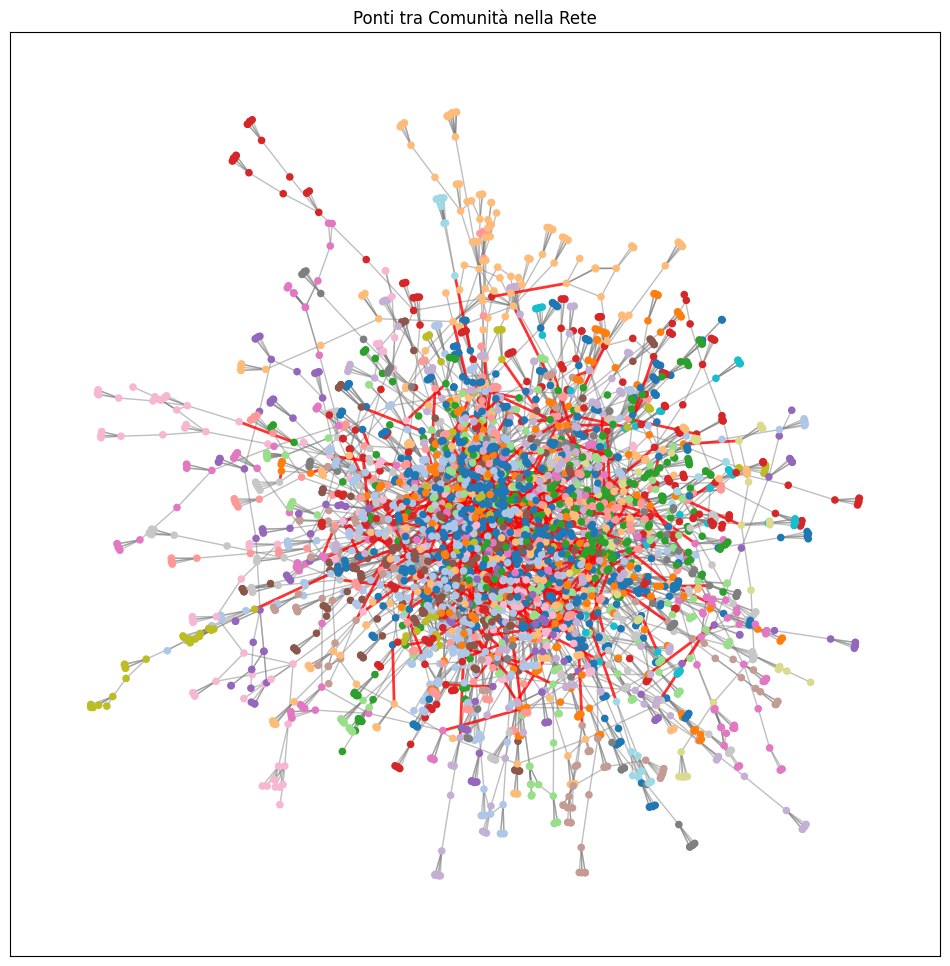

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Assumi che community_labels sia generato come segue:
# community_labels deve essere un dizionario con i nodi come chiavi e i numeri delle comunità come valori
# Se non esiste, puoi generarlo utilizzando l'algoritmo di rilevamento comunità
from networkx.algorithms.community import greedy_modularity_communities

# Trova le comunità usando l'algoritmo di Greedy Modularity
communities = list(greedy_modularity_communities(G))
community_labels = {}
for i, community in enumerate(communities):
    for node in community:
        community_labels[node] = i

# Mappa comunità-nodi
community_nodes = defaultdict(list)
for node, comm in community_labels.items():
    community_nodes[comm].append(node)

# Identifica ponti tra comunità
bridges = []
for u, v in G.edges():
    if community_labels[u] != community_labels[v]:
        bridges.append((u, v))

print(f"Numero di ponti tra comunità: {len(bridges)}")

# Visualizzazione dei ponti tra comunità
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

# Disegna i nodi con il colore delle comunità
node_colors = [community_labels[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=20)

# Disegna gli archi tra nodi della stessa comunità
same_comm_edges = [(u, v) for u, v in G.edges() if community_labels[u] == community_labels[v]]
nx.draw_networkx_edges(G, pos, edgelist=same_comm_edges, edge_color="gray", alpha=0.5)

# Evidenzia i ponti
nx.draw_networkx_edges(G, pos, edgelist=bridges, edge_color="red", alpha=0.8, width=2)

plt.title("Ponti tra Comunità nella Rete")
plt.show()

**Ora controllo i nodi che appaiono nei ponti e analizzare il loro ruolo nella rete.
Considero di visualizzare i nodi con gradi di centralità elevati in combinazione con i ponti per capire se i ponti coinvolgono nodi centrali o meno. ⬇️**


Top 10 nodi coinvolti nei ponti per Degree Centrality:
  Nodo: Jim Cummings, Degree Centrality: 0.0088
  Nodo: Larry the Cable Guy, Degree Centrality: 0.0051
  Nodo: Bill Farmer, Degree Centrality: 0.0048
  Nodo: Keith Ferguson, Degree Centrality: 0.0043
  Nodo: Corey Burton, Degree Centrality: 0.0043
  Nodo: Pinto Colvig, Degree Centrality: 0.0040
  Nodo: Jeff Bennett, Degree Centrality: 0.0040
  Nodo: Tony Hale, Degree Centrality: 0.0037
  Nodo: Wallace Shawn, Degree Centrality: 0.0035
  Nodo: Dee Baker, Degree Centrality: 0.0032

Top 10 nodi coinvolti nei ponti per Betweenness Centrality:
  Nodo: Jim Cummings, Betweenness Centrality: 0.1529
  Nodo: Jeff Bennett, Betweenness Centrality: 0.0764
  Nodo: Corey Burton, Betweenness Centrality: 0.0623
  Nodo: Gnomeo & Juliet, Betweenness Centrality: 0.0623
  Nodo: Wallace Shawn, Betweenness Centrality: 0.0592
  Nodo: Russi Taylor, Betweenness Centrality: 0.0518
  Nodo: Brenda Song, Betweenness Centrality: 0.0489
  Nodo: Get a Horse!, Betw

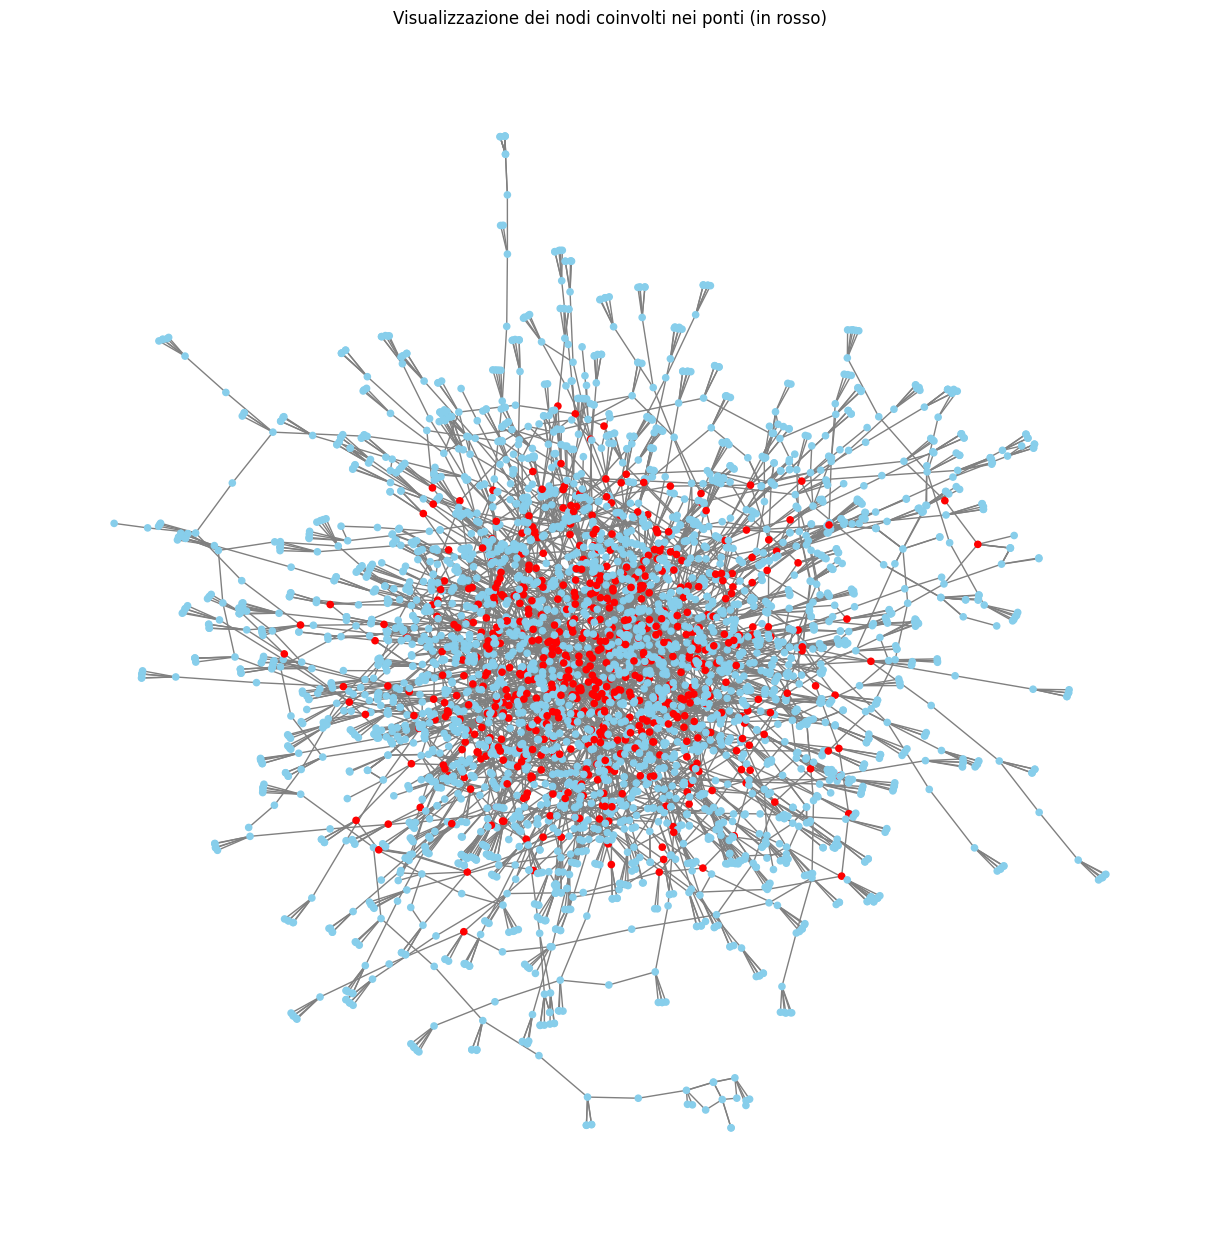

In [34]:
from collections import Counter

# Identifica i nodi coinvolti nei ponti
nodes_in_bridges = set()
for u, v in bridges:
    nodes_in_bridges.add(u)
    nodes_in_bridges.add(v)

# Calcola le metriche di centralità per i nodi nei ponti
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Filtra solo i nodi nei ponti
bridge_nodes_centrality = {
    "Degree Centrality": {node: degree_centrality[node] for node in nodes_in_bridges},
    "Betweenness Centrality": {node: betweenness_centrality[node] for node in nodes_in_bridges},
    "Closeness Centrality": {node: closeness_centrality[node] for node in nodes_in_bridges},
}

# Ordina i nodi per centralità
top_bridge_nodes = {
    metric: sorted(values.items(), key=lambda x: x[1], reverse=True)[:10]
    for metric, values in bridge_nodes_centrality.items()
}

# Stampa i risultati
for metric, top_nodes in top_bridge_nodes.items():
    print(f"\nTop 10 nodi coinvolti nei ponti per {metric}:")
    for node, value in top_nodes:
        print(f"  Nodo: {node}, {metric}: {value:.4f}")

# Visualizzazione dei nodi coinvolti nei ponti con colore diverso
bridge_node_color = [
    "red" if node in nodes_in_bridges else "skyblue" for node in G.nodes()
]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G, pos,
    node_color=bridge_node_color,
    edge_color="gray",
    node_size=20,
    with_labels=False
)
plt.title("Visualizzazione dei nodi coinvolti nei ponti (in rosso)")
plt.show()


**Dall'analisi dei nodi coinvolti nei ponti tra comunità, utilizzando le metriche di centralità, si possono fare diverse osservazioni interessanti:**

1. Ruolo di Jim Cummings
Jim Cummings emerge chiaramente come il nodo più influente nei ponti tra comunità:
Degree Centrality: È il nodo con il maggior numero di connessioni dirette relative ai nodi nei ponti, indicando che è un nodo chiave per collegare vari attori o film/serie nella rete.
Betweenness Centrality: Ha il valore più alto, mostrando che funge da intermediario essenziale nel flusso di informazioni o connessioni tra comunità. Questo lo rende un "ponte critico".
Closeness Centrality: È anche il nodo più vicino agli altri nodi, suggerendo che ha accesso rapido (in termini di passi) ad altre parti della rete.
2. Altri nodi importanti
Jeff Bennett, Corey Burton, e Wallace Shawn si distinguono in tutte e tre le metriche, indicando che:
Sono nodi con un buon numero di connessioni dirette (Degree Centrality).
Ricoprono un ruolo di intermediari significativi tra comunità (Betweenness Centrality).
Hanno una posizione centrale che consente loro di raggiungere rapidamente gli altri nodi nella rete (Closeness Centrality).
3. Influenza specifica di nodi particolari
Gnomeo & Juliet appare con valori alti di Betweenness e Closeness Centrality, suggerendo che questo nodo rappresenta un collegamento chiave tra film/attori di comunità diverse.
Bill Farmer e Russi Taylor:
Bill Farmer è rilevante per il suo elevato valore di Degree e Closeness Centrality, implicando che è ben connesso e accessibile.
Russi Taylor ha un valore significativo di Betweenness, suggerendo un ruolo da intermediario.
4. Importanza delle connessioni tra comunità
I nodi con alto Betweenness Centrality (come Brenda Song e Stephen Tobolowsky) hanno un ruolo cruciale nel mantenere la rete connessa. La loro rimozione potrebbe causare una frammentazione della rete, separando comunità precedentemente connesse.
Nodi come A Goofy Movie e Tarzan & Jane con alti valori di Closeness Centrality suggeriscono che rappresentano collegamenti veloci e strategici per muoversi tra le comunità.
5. Implicazioni generali
I nodi identificati sono fondamentali per la struttura della rete, poiché connettono comunità altrimenti separate. La loro presenza garantisce la coesione complessiva del network.
Analizzando i ponti, si può evidenziare che i nodi centrali (sia attori che film) hanno un ruolo importante nella diffusione di informazioni o connessioni, e possono rappresentare obiettivi per strategie di marketing, collaborazioni o interventi di ottimizzazione della rete.

## ANALISI DELLE EGO NETWORK

Ego Network di Jim Cummings
Numero di nodi: 34
Numero di archi: 33
Densità: 0.0588



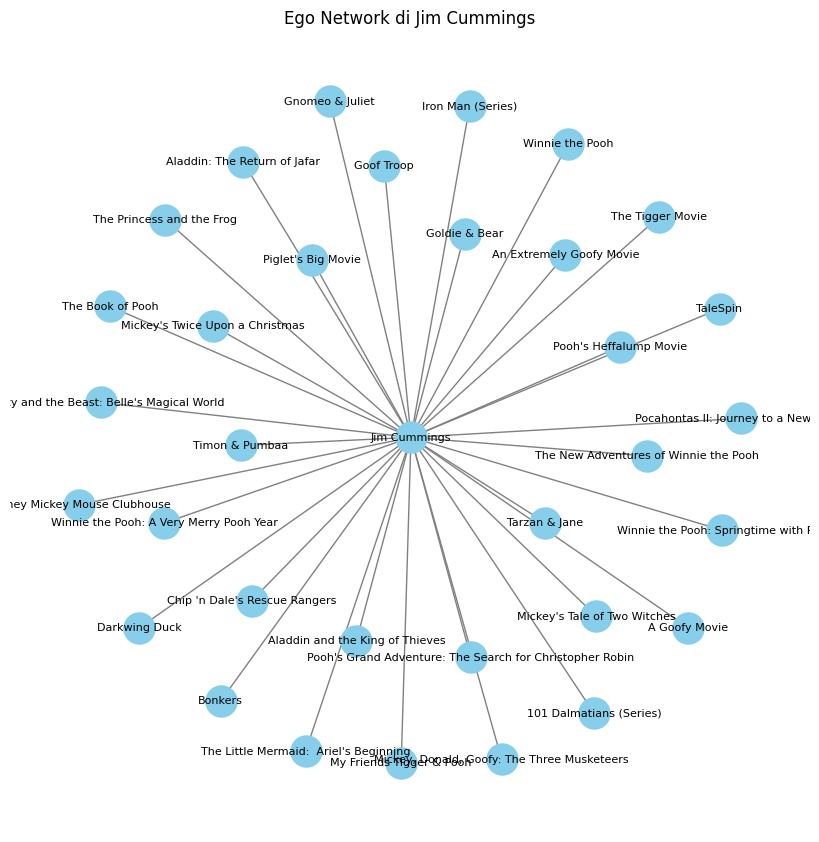

Ego Network di Jeff Bennett
Numero di nodi: 16
Numero di archi: 15
Densità: 0.1250



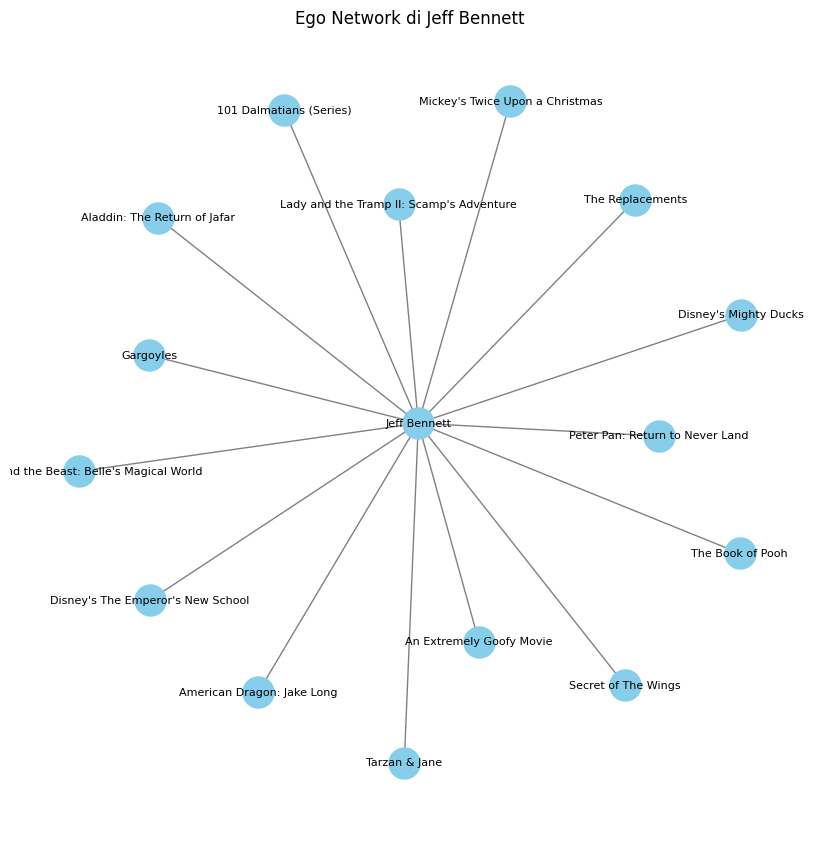

Ego Network di Corey Burton
Numero di nodi: 17
Numero di archi: 16
Densità: 0.1176



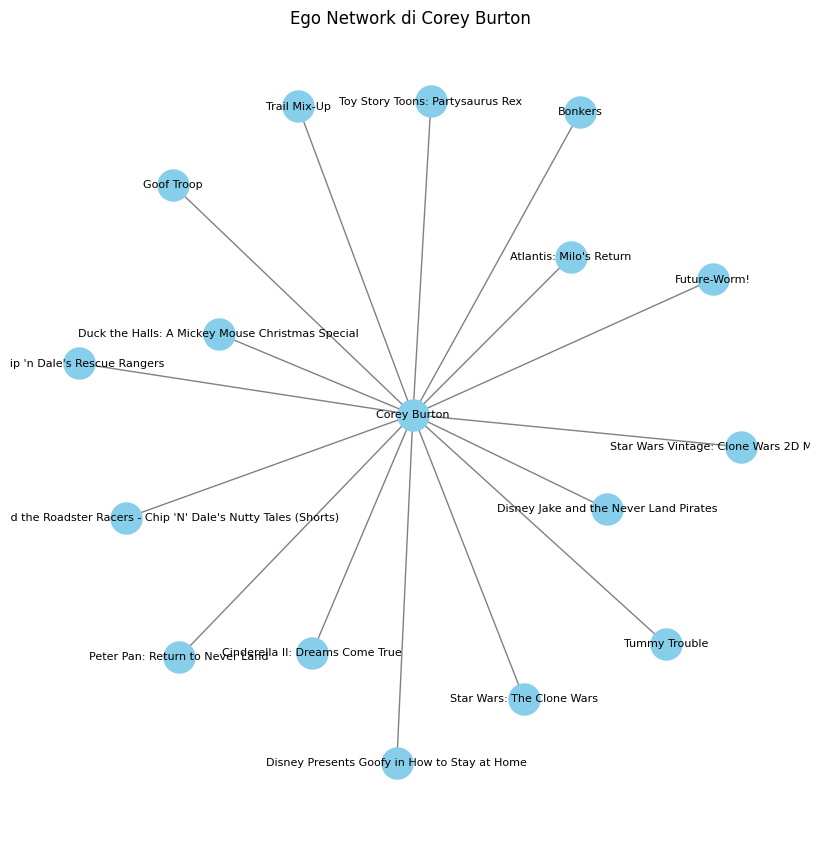

Ego Network di Wallace Shawn
Numero di nodi: 14
Numero di archi: 13
Densità: 0.1429



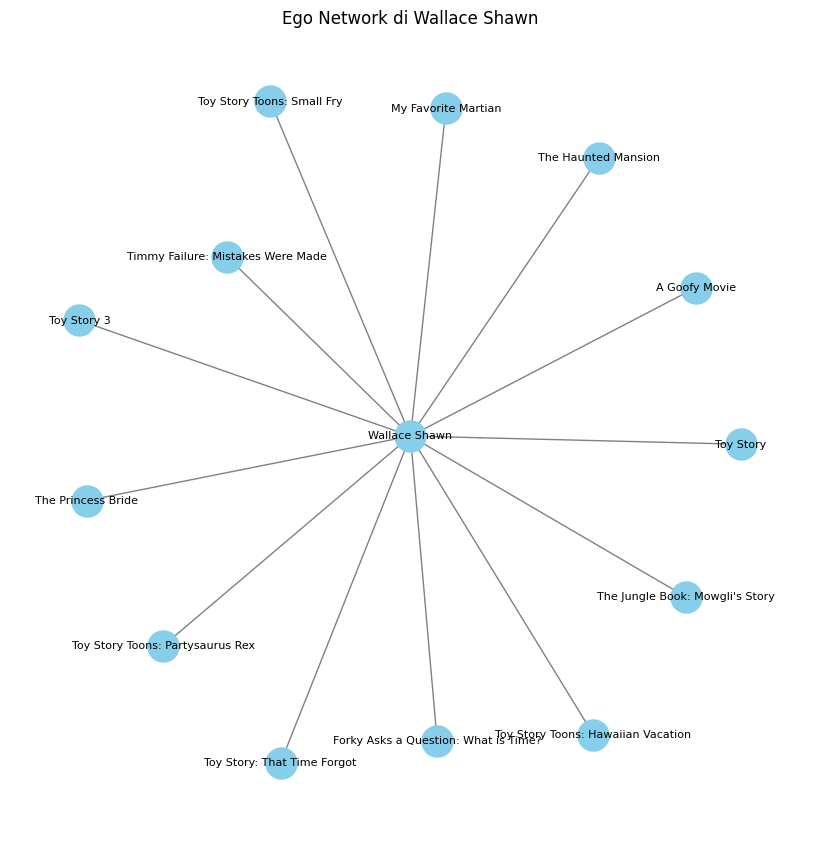

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Funzione per analizzare e visualizzare una ego network
def analyze_ego_network(G, central_node):
    # Costruzione della ego network
    ego_net = nx.ego_graph(G, central_node, radius=1)

    # Calcolo delle metriche locali
    num_nodes = ego_net.number_of_nodes()
    num_edges = ego_net.number_of_edges()
    density = nx.density(ego_net)

    print(f"Ego Network di {central_node}")
    print(f"Numero di nodi: {num_nodes}")
    print(f"Numero di archi: {num_edges}")
    print(f"Densità: {density:.4f}\n")

    # Visualizzazione della ego network
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(ego_net)
    nx.draw(
        ego_net, pos,
        with_labels=True,
        node_color='skyblue',
        edge_color='gray',
        node_size=500,
        font_size=8
    )
    plt.title(f"Ego Network di {central_node}")
    plt.show()

# Esempio: analisi della ego network di Jim Cummings
central_node = "Jim Cummings"
analyze_ego_network(G, central_node)

# Ripeti per altri nodi di interesse
nodes_of_interest = ["Jeff Bennett", "Corey Burton", "Wallace Shawn"]
for node in nodes_of_interest:
    analyze_ego_network(G, node)


**Distribuzione dei gradi negli ego network**

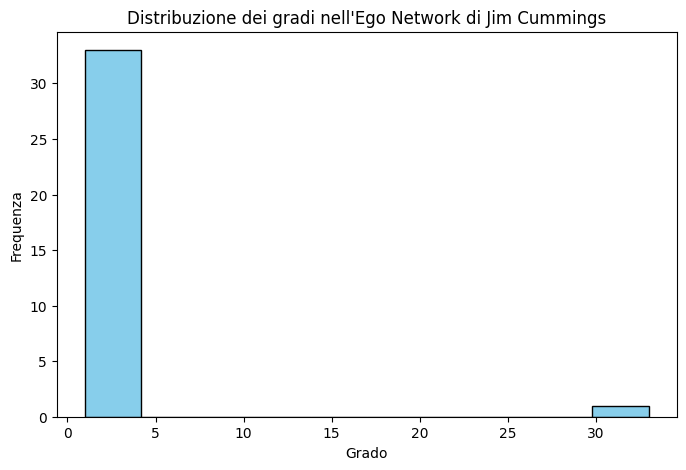

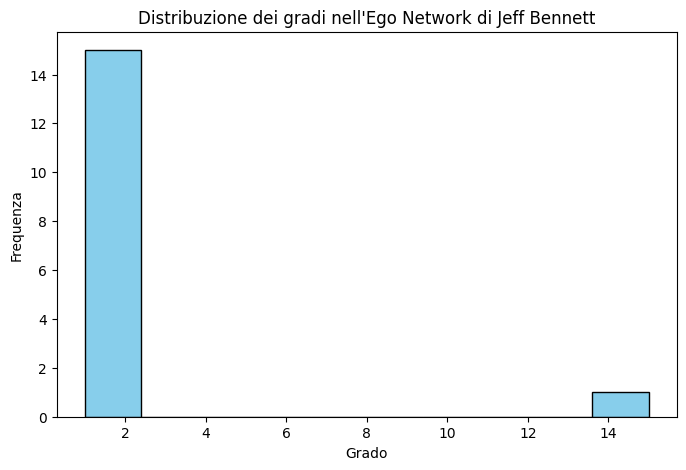

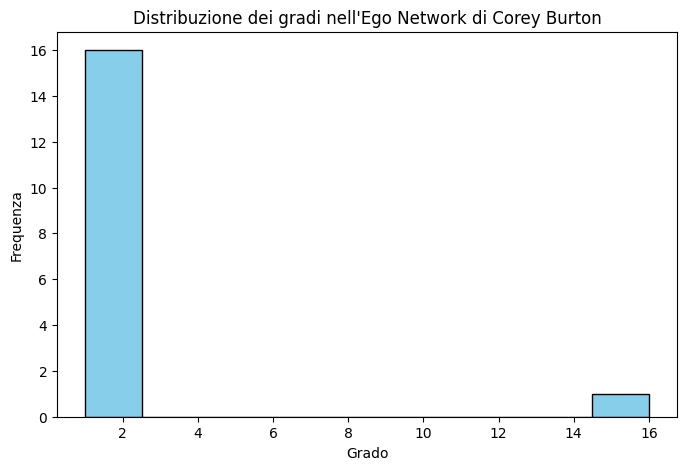

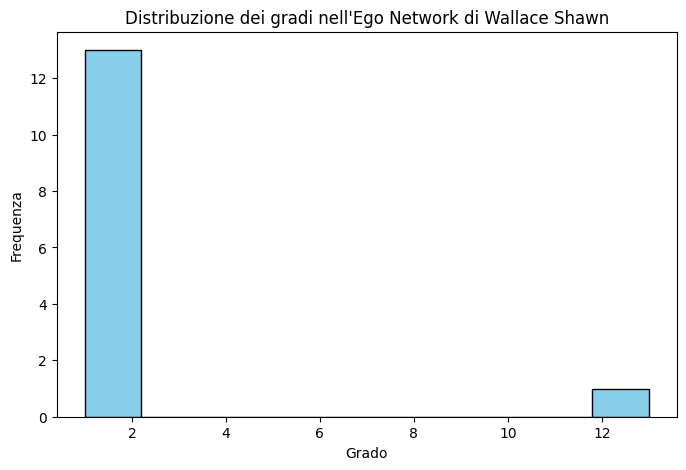

In [36]:
# Calcola la distribuzione del grado per ciascun ego network
def analyze_degree_distribution(ego_networks):
    for central_node, ego_net in ego_networks.items():
        degrees = dict(ego_net.degree())
        plt.figure(figsize=(8, 5))
        plt.hist(degrees.values(), bins=10, color='skyblue', edgecolor='black')
        plt.title(f"Distribuzione dei gradi nell'Ego Network di {central_node}")
        plt.xlabel("Grado")
        plt.ylabel("Frequenza")
        plt.show()

# Lista dei nodi centrali da analizzare
central_nodes = ["Jim Cummings", "Jeff Bennett", "Corey Burton", "Wallace Shawn"]

# Costruisce gli ego network per i nodi centrali
ego_networks = {node: nx.ego_graph(G, node) for node in central_nodes}

# Analizza la distribuzione dei gradi
analyze_degree_distribution(ego_networks)


**Metriche di centralità negli ego network**

In [37]:
# Calcola metriche di centralità per ogni ego network
def analyze_centrality_in_ego_networks(ego_networks):
    for central_node, ego_net in ego_networks.items():
        degree_centrality = nx.degree_centrality(ego_net)
        betweenness_centrality = nx.betweenness_centrality(ego_net)
        closeness_centrality = nx.closeness_centrality(ego_net)

        print(f"\nMetriche di centralità nell'Ego Network di {central_node}:")
        print("Top 5 nodi per Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
        print("Top 5 nodi per Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
        print("Top 5 nodi per Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

# Analizza le metriche di centralità
analyze_centrality_in_ego_networks(ego_networks)



Metriche di centralità nell'Ego Network di Jim Cummings:
Top 5 nodi per Degree Centrality: [('Jim Cummings', 1.0), ('A Goofy Movie', 0.030303030303030304), ('The New Adventures of Winnie the Pooh', 0.030303030303030304), ('Aladdin: The Return of Jafar', 0.030303030303030304), ('My Friends Tigger & Pooh', 0.030303030303030304)]
Top 5 nodi per Betweenness Centrality: [('Jim Cummings', 1.0), ('A Goofy Movie', 0.0), ('The New Adventures of Winnie the Pooh', 0.0), ('Aladdin: The Return of Jafar', 0.0), ('My Friends Tigger & Pooh', 0.0)]
Top 5 nodi per Closeness Centrality: [('Jim Cummings', 1.0), ('A Goofy Movie', 0.5076923076923077), ('The New Adventures of Winnie the Pooh', 0.5076923076923077), ('Aladdin: The Return of Jafar', 0.5076923076923077), ('My Friends Tigger & Pooh', 0.5076923076923077)]

Metriche di centralità nell'Ego Network di Jeff Bennett:
Top 5 nodi per Degree Centrality: [('Jeff Bennett', 1.0), ("Mickey's Twice Upon a Christmas", 0.06666666666666667), ('101 Dalmatians (Se

**Espansione alle connessioni indirette**
Analizziamo i nodi a distanza 2 per identificare connessioni indirette.

In [38]:
# Estensione delle connessioni agli "amici degli amici"
def analyze_distance_2_connections(ego_networks):
    for central_node, ego_net in ego_networks.items():
        # Conta i nodi a distanza 2
        nodes_distance_2 = {neighbor for node in ego_net for neighbor in nx.neighbors(G, node) if neighbor not in ego_net}
        print(f"\nNumero di nodi a distanza 2 per {central_node}: {len(nodes_distance_2)}")

# Analizza i nodi a distanza 2
analyze_distance_2_connections(ego_networks)



Numero di nodi a distanza 2 per Jim Cummings: 99

Numero di nodi a distanza 2 per Jeff Bennett: 63

Numero di nodi a distanza 2 per Corey Burton: 57

Numero di nodi a distanza 2 per Wallace Shawn: 47


**Caratterizzazione tematica**
Colleghiamo i generi e i progetti dei nodi nei vari ego network.

In [39]:
# Analisi tematica basata sul genere
def analyze_thematic_overlap(df, ego_networks):
    for central_node, ego_net in ego_networks.items():
        movie_titles = [node for node in ego_net.nodes if node in df['title'].values]
        genres = df[df['title'].isin(movie_titles)]['listed_in'].dropna().str.split(',').explode().value_counts()
        print(f"\nAnalisi tematica per {central_node}:")
        print(genres)

# Analizza la sovrapposizione tematica
analyze_thematic_overlap(df, ego_networks)



Analisi tematica per Jim Cummings:
listed_in
Action-Adventure    17
 Animation          17
 Kids               16
Animation           15
 Family             10
 Comedy              9
 Fantasy             2
 Buddy               2
 Anthology           2
Comedy               1
 Drama               1
 Musical             1
Name: count, dtype: int64

Analisi tematica per Jeff Bennett:
listed_in
Action-Adventure    8
 Animation          8
 Comedy             6
Animation           6
 Family             4
 Kids               3
 Fantasy            3
 Anthology          2
 Coming of Age      2
Comedy              1
Name: count, dtype: int64

Analisi tematica per Corey Burton:
listed_in
Action-Adventure    8
 Animation          8
 Comedy             7
Animation           6
 Family             5
 Kids               4
 Fantasy            2
Family              1
Series              1
 Buddy              1
 Science Fiction    1
Name: count, dtype: int64

Analisi tematica per Wallace Shawn:
listed_in

**Visualizzazione della sovrapposizione tra ego network**
Visualizziamo le connessioni condivise tra i diversi ego network.

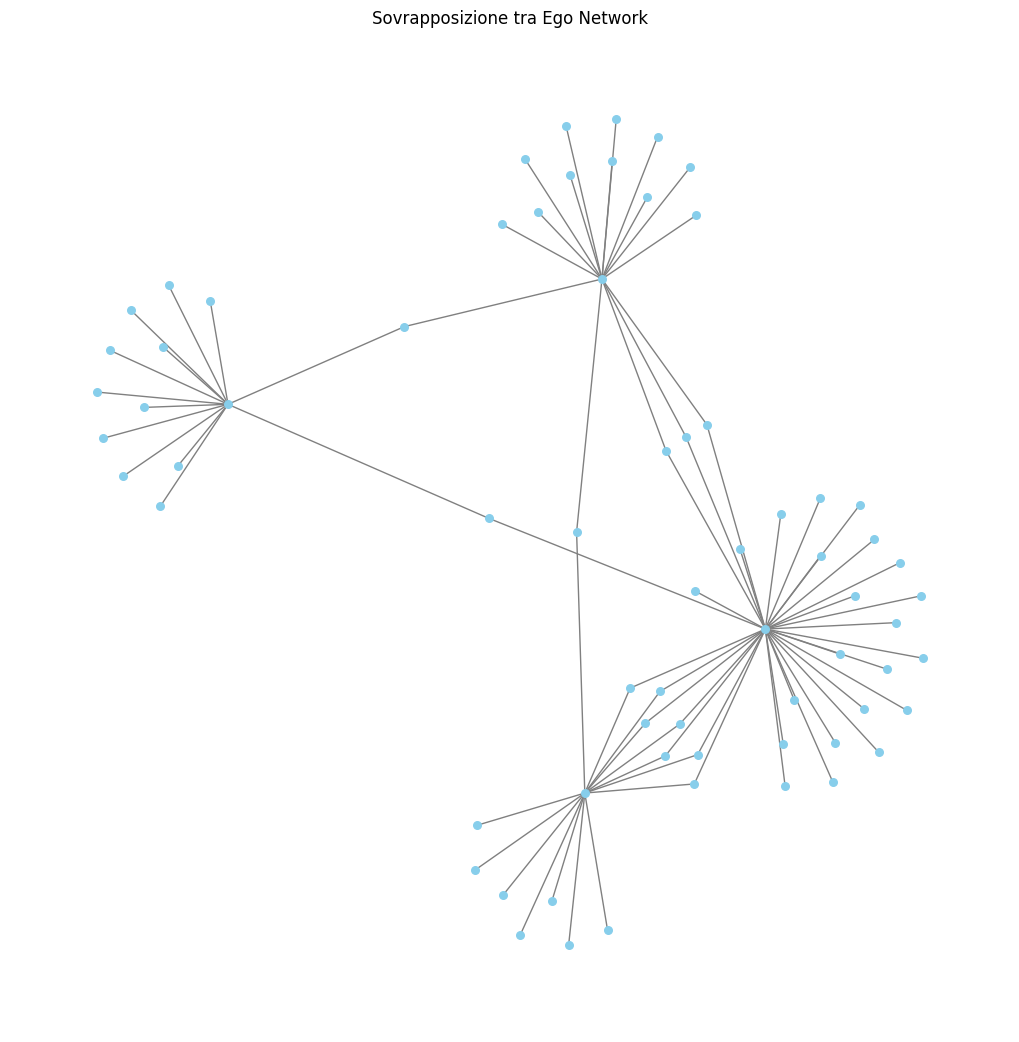

In [40]:
# Visualizzazione della sovrapposizione tra ego network
def visualize_ego_overlap(ego_networks):
    combined_graph = nx.Graph()
    for ego_net in ego_networks.values():
        combined_graph = nx.compose(combined_graph, ego_net)

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(combined_graph)
    nx.draw(combined_graph, pos, node_size=30, edge_color='gray', with_labels=False, node_color='skyblue')
    plt.title("Sovrapposizione tra Ego Network")
    plt.show()

# Visualizza la sovrapposizione
visualize_ego_overlap(ego_networks)


## RISULTATI (FINO A QUI) ANALISI EGO NETWORK ⬇️
- Gli ego network confermano la struttura collaborativa dell'universo Disney, dove attori e produzioni si sovrappongono frequentemente.
- Jim Cummings emerge come il nodo più centrale e versatile, probabilmente per il numero significativo di ruoli vocali in produzioni animate.
- Le analisi delle tematiche sottolineano il target primario della Disney, con enfasi su "Family", "Kids", e "Animation".

**Focus su Sovrapposizioni più Complesse**
Analizzare cluster o nodi specifici per identificare connessioni forti tra attori o produzioni:

In [41]:
# Identifica i nodi comuni nei diversi ego network
ego_nodes = {
    'Jim Cummings': list(nx.ego_graph(G, 'Jim Cummings', radius=1).nodes),
    'Jeff Bennett': list(nx.ego_graph(G, 'Jeff Bennett', radius=1).nodes),
    'Corey Burton': list(nx.ego_graph(G, 'Corey Burton', radius=1).nodes),
    'Wallace Shawn': list(nx.ego_graph(G, 'Wallace Shawn', radius=1).nodes)
}

# Calcola l'intersezione tra ego network
overlaps = {}
for ego1, nodes1 in ego_nodes.items():
    for ego2, nodes2 in ego_nodes.items():
        if ego1 != ego2:
            common_nodes = set(nodes1).intersection(nodes2)
            overlaps[f"{ego1} & {ego2}"] = common_nodes

# Visualizza i nodi comuni tra i network
for pair, common in overlaps.items():
    print(f"Nodi comuni tra {pair}: {len(common)} - {common}")


Nodi comuni tra Jim Cummings & Jeff Bennett: 7 - {'101 Dalmatians (Series)', 'The Book of Pooh', 'Aladdin: The Return of Jafar', 'Tarzan & Jane', "Beauty and the Beast: Belle's Magical World", "Mickey's Twice Upon a Christmas", 'An Extremely Goofy Movie'}
Nodi comuni tra Jim Cummings & Corey Burton: 3 - {'Bonkers', "Chip 'n Dale's Rescue Rangers", 'Goof Troop'}
Nodi comuni tra Jim Cummings & Wallace Shawn: 1 - {'A Goofy Movie'}
Nodi comuni tra Jeff Bennett & Jim Cummings: 7 - {'101 Dalmatians (Series)', 'Aladdin: The Return of Jafar', 'The Book of Pooh', 'Tarzan & Jane', "Beauty and the Beast: Belle's Magical World", "Mickey's Twice Upon a Christmas", 'An Extremely Goofy Movie'}
Nodi comuni tra Jeff Bennett & Corey Burton: 1 - {'Peter Pan: Return to Never Land'}
Nodi comuni tra Jeff Bennett & Wallace Shawn: 0 - set()
Nodi comuni tra Corey Burton & Jim Cummings: 3 - {'Bonkers', "Chip 'n Dale's Rescue Rangers", 'Goof Troop'}
Nodi comuni tra Corey Burton & Jeff Bennett: 1 - {'Peter Pan: R

**Evoluzione Temporale**
Esamina come si sono formate o evolute le connessioni negli anni, usando la colonna release_year:

In [42]:
# Aggiungi l'anno ai nodi nel grafo principale
for node in G.nodes:
    if node in df['title'].values:
        release_year = df.loc[df['title'] == node, 'release_year'].values[0]
        G.nodes[node]['release_year'] = release_year

# Filtra il grafo per intervalli di tempo
def filter_graph_by_year(G, start_year, end_year):
    return G.subgraph([
        node for node, attr in G.nodes(data=True)
        if attr.get('release_year') and start_year <= attr['release_year'] <= end_year
    ])

# Analizza il grafo per decenni
for decade_start in range(1940, 2030, 10):
    filtered_G = filter_graph_by_year(G, decade_start, decade_start + 9)
    print(f"Grafo dal {decade_start} al {decade_start+9}:")
    print(f"  Nodi: {filtered_G.number_of_nodes()}")
    print(f"  Archi: {filtered_G.number_of_edges()}")


Grafo dal 1940 al 1949:
  Nodi: 11
  Archi: 0
Grafo dal 1950 al 1959:
  Nodi: 29
  Archi: 0
Grafo dal 1960 al 1969:
  Nodi: 24
  Archi: 0
Grafo dal 1970 al 1979:
  Nodi: 25
  Archi: 0
Grafo dal 1980 al 1989:
  Nodi: 35
  Archi: 0
Grafo dal 1990 al 1999:
  Nodi: 124
  Archi: 0
Grafo dal 2000 al 2009:
  Nodi: 240
  Archi: 0
Grafo dal 2010 al 2019:
  Nodi: 321
  Archi: 0
Grafo dal 2020 al 2029:
  Nodi: 97
  Archi: 0


Ecco alcune considerazioni e deduzioni che puoi fare sulla base dei risultati:

### 1. **Sovrapposizione tra Ego Network**
- **Nodi comuni tra gli attori principali:**
  - **Jim Cummings** e **Jeff Bennett** condividono 7 produzioni, indicando una forte collaborazione tra i due.
  - **Jim Cummings** e **Corey Burton** condividono 3 produzioni, mentre con **Wallace Shawn** solo 1, mostrando che la collaborazione tra Cummings e Shawn è più rara.
  - **Jeff Bennett** e **Corey Burton** condividono solo 1 produzione, mostrando una connessione limitata.
  - **Wallace Shawn** non condivide alcuna produzione con **Jeff Bennett**, evidenziando una mancanza di collaborazione tra questi due attori.
  - La presenza di connessioni tra alcuni attori (es. Jim Cummings e Jeff Bennett) può indicare cluster o sottoreti basate su specifici generi o franchise.

#### **Deducibile:**
  - **Jim Cummings** emerge come nodo centrale, dato il numero relativamente alto di connessioni condivise con gli altri.
  - Le produzioni condivise sono spesso legate a franchise Disney famosi come *"101 Dalmatians (Series)"*, *"Aladdin: The Return of Jafar"*, e *"A Goofy Movie"*.

---

### 2. **Evoluzione Temporale delle Produzioni**
- La distribuzione temporale evidenzia una chiara crescita nella produzione:
  - **Dal 1940 al 1980**, il numero di nodi è molto basso (11-35 nodi per decennio). Questo riflette l'epoca classica Disney, con una produzione più limitata e focalizzata su pochi film animati di alta qualità.
  - **Dal 1990 in poi**, si nota un'esplosione nel numero di nodi:
    - Dal 1990 al 1999: 124 nodi (probabilmente dovuto all'espansione di Disney nelle serie TV e produzioni direct-to-video).
    - Dal 2000 al 2009: 240 nodi, rappresentando il picco iniziale dell'espansione Disney con acquisizioni e produzioni di massa.
    - Dal 2010 al 2019: 321 nodi, un ulteriore aumento grazie all'acquisizione di franchise come Marvel, Lucasfilm e Pixar.
  - Nel periodo **2020-2029**, il numero di nodi scende a 97, probabilmente per la pandemia che ha rallentato la produzione e favorito lo streaming (es. Disney+).

#### **Deducibile:**
  - L'espansione delle connessioni nella rete è avvenuta principalmente dagli anni '90 in poi, in coincidenza con l'espansione del business Disney in nuove aree come serie TV, direct-to-video e franchise come Marvel e Pixar.
  - I periodi pre-1980 mostrano una rete più frammentata, mentre la rete moderna è altamente densa e interconnessa.

---

### 3. **Collaborazioni tra Attori e Temi Dominanti**
- Gli attori come Jim Cummings e Jeff Bennett sono legati a produzioni principalmente di animazione, famiglie e avventura, riflettendo i temi principali delle produzioni Disney.
- Le connessioni condivise tra Jim Cummings, Jeff Bennett e Corey Burton mostrano una centralità nei franchise animati e nelle serie Disney.

#### **Deducibile:**
  - Gli attori più centrali tendono a collaborare in produzioni con temi simili, formando cluster tematici nella rete.
  - Gli ego network analizzati suggeriscono che molti attori lavorano in un numero ristretto di produzioni condivise, riflettendo un'elevata specializzazione o coinvolgimento nei franchise Disney.

## Analizzare le produzioni per tema e vedere se gli attori sono legati a specifici generi (es. animazione, live-action, avventura).

In [43]:
# Analisi dei cluster tematici per ogni attore centrale
from collections import Counter

def analyze_theme_distribution(node_name, graph, data_frame):
    # Ottieni i nodi collegati all'attore centrale
    ego_network_nodes = list(graph.neighbors(node_name))
    
    # Filtra i temi dei titoli collegati
    themes = data_frame[data_frame['title'].isin(ego_network_nodes)]['listed_in'].dropna().str.split(',')
    flattened_themes = [theme.strip() for sublist in themes for theme in sublist]
    
    # Conta le occorrenze dei temi
    theme_counts = Counter(flattened_themes)
    return theme_counts

# Esempio: analisi dei temi per Jim Cummings
themes_jim = analyze_theme_distribution('Jim Cummings', G, df)
print("Temi principali per Jim Cummings:", themes_jim)

# Ripeti per gli altri attori principali
themes_jeff = analyze_theme_distribution('Jeff Bennett', G, df)
themes_corey = analyze_theme_distribution('Corey Burton', G, df)
themes_wallace = analyze_theme_distribution('Wallace Shawn', G, df)

# Mostra i temi principali per ogni attore
print("Temi principali per Jeff Bennett:", themes_jeff)
print("Temi principali per Corey Burton:", themes_corey)
print("Temi principali per Wallace Shawn:", themes_wallace)


Temi principali per Jim Cummings: Counter({'Animation': 32, 'Action-Adventure': 17, 'Kids': 16, 'Family': 10, 'Comedy': 10, 'Fantasy': 2, 'Buddy': 2, 'Anthology': 2, 'Drama': 1, 'Musical': 1})
Temi principali per Jeff Bennett: Counter({'Animation': 14, 'Action-Adventure': 8, 'Comedy': 7, 'Family': 4, 'Kids': 3, 'Fantasy': 3, 'Anthology': 2, 'Coming of Age': 2})
Temi principali per Corey Burton: Counter({'Animation': 14, 'Action-Adventure': 8, 'Comedy': 7, 'Family': 6, 'Kids': 4, 'Fantasy': 2, 'Series': 1, 'Buddy': 1, 'Science Fiction': 1})
Temi principali per Wallace Shawn: Counter({'Comedy': 10, 'Animation': 8, 'Family': 7, 'Action-Adventure': 5, 'Buddy': 2, 'Drama': 2, 'Science Fiction': 1, 'Fantasy': 1, 'Coming of Age': 1, 'Kids': 1})


## Valutare l'influenza temporale: Confrontare la densità della rete negli anni per vedere se ci sono periodi in cui gli attori centrali hanno maggiori connessioni.

In [44]:
# Funzione per analizzare l'influenza temporale
def temporal_analysis(graph, data_frame, start_year, end_year):
    # Filtra i titoli per l'intervallo di anni
    filtered_titles = data_frame[(data_frame['release_year'] >= start_year) & 
                                 (data_frame['release_year'] <= end_year)]['title']
    
    # Crea un sub-grafo con i nodi nell'intervallo di anni
    subgraph_nodes = set(filtered_titles)
    subgraph = graph.subgraph(subgraph_nodes)
    
    # Calcola il numero di nodi e archi
    num_nodes = subgraph.number_of_nodes()
    num_edges = subgraph.number_of_edges()
    return num_nodes, num_edges

# Intervalli temporali
decades = [(1940, 1949), (1950, 1959), (1960, 1969), (1970, 1979), 
           (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019), (2020, 2029)]

# Analisi per decade
for start, end in decades:
    nodes, edges = temporal_analysis(G, df, start, end)
    print(f"Grafo dal {start} al {end}:")
    print(f"  Nodi: {nodes}")
    print(f"  Archi: {edges}")


Grafo dal 1940 al 1949:
  Nodi: 11
  Archi: 0
Grafo dal 1950 al 1959:
  Nodi: 29
  Archi: 0
Grafo dal 1960 al 1969:
  Nodi: 24
  Archi: 0
Grafo dal 1970 al 1979:
  Nodi: 25
  Archi: 0
Grafo dal 1980 al 1989:
  Nodi: 35
  Archi: 0
Grafo dal 1990 al 1999:
  Nodi: 124
  Archi: 0
Grafo dal 2000 al 2009:
  Nodi: 240
  Archi: 0
Grafo dal 2010 al 2019:
  Nodi: 321
  Archi: 0
Grafo dal 2020 al 2029:
  Nodi: 97
  Archi: 0


## Analizzare nuovi nodi centrali: Verificare se ci sono attori che emergono come importanti in determinati decenni ma non nella rete globale.

In [45]:
# Funzione per trovare i nodi centrali in un intervallo temporale
def find_central_nodes_in_period(graph, data_frame, start_year, end_year, centrality_measure=nx.degree_centrality):
    # Filtra i titoli per l'intervallo di anni
    filtered_titles = data_frame[(data_frame['release_year'] >= start_year) & 
                                 (data_frame['release_year'] <= end_year)]['title']
    
    # Crea un sub-grafo
    subgraph_nodes = set(filtered_titles)
    subgraph = graph.subgraph(subgraph_nodes)
    
    # Calcola la centralità
    centrality = centrality_measure(subgraph)
    
    # Ordina i nodi per centralità
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return sorted_centrality[:10]

# Analisi centralità per il periodo 1990-1999
top_central_1990s = find_central_nodes_in_period(G, df, 1990, 1999)
print("Top nodi centrali dal 1990 al 1999:", top_central_1990s)

# Analisi centralità per il periodo 2000-2009
top_central_2000s = find_central_nodes_in_period(G, df, 2000, 2009)
print("Top nodi centrali dal 2000 al 2009:", top_central_2000s)

# Analisi centralità per il periodo 2010-2019
top_central_2010s = find_central_nodes_in_period(G, df, 2010, 2019)
print("Top nodi centrali dal 2010 al 2019:", top_central_2010s)


Top nodi centrali dal 1990 al 1999: [("Disney's The Little Mermaid (Series)", 0.0), ("Don't Look Under the Bed", 0.0), ('Adventures in Wonderland', 0.0), ('Life With Mikey', 0.0), ('Pocahontas II: Journey to a New World', 0.0), ('Honey, We Shrunk Ourselves', 0.0), ('Iron Man (Series)', 0.0), ('The Sandlot', 0.0), ('Trail Mix-Up', 0.0), ('The Brave Little Toaster Goes to Mars', 0.0)]
Top nodi centrali dal 2000 al 2009: [('The Haunted Mansion', 0.0), ('Kingdom of the Blue Whale', 0.0), ('The Rookie', 0.0), ('Handy Manny', 0.0), ("Marvel Studios' Iron Man", 0.0), ('Camp Rock', 0.0), ('Skyrunners', 0.0), ('Tarzan II', 0.0), ("Kronk's New Groove", 0.0), ("The Little Mermaid:  Ariel's Beginning", 0.0)]
Top nodi centrali dal 2010 al 2019: [('Phineas and Ferb: Mission Marvel', 0.0), ('Hidden Figures', 0.0), ('Cars Toon: Time Travel Mater', 0.0), ('Disney Phineas and Ferb: Phineas and Ferb Star Wars', 0.0), ('Cars 2', 0.0), ('The Book of Life', 0.0), ('Decorating Disney: Holiday Magic', 0.0), (

Ecco alcune deduzioni basate sui risultati delle analisi:

### **1. Temi Principali**
- **Jim Cummings** ha una forte associazione con il genere **Animation**, seguito da **Action-Adventure**, **Kids**, e **Family**. Questo suggerisce che il suo lavoro si concentra su progetti orientati verso un pubblico giovane e familiare, con un'enfasi sull'animazione.
- **Jeff Bennett** e **Corey Burton** mostrano profili tematici simili, con un focus primario su **Animation**, **Action-Adventure**, e **Comedy**. Tuttavia, Corey Burton ha una leggera influenza su generi più specifici come **Science Fiction**.
- **Wallace Shawn**, invece, si distingue con un maggiore focus sul genere **Comedy**, seguito da **Animation** e **Family**, indicando un coinvolgimento in progetti orientati all'umorismo e alla famiglia.

**Deducibile:** 
- Gli attori principali hanno un'impronta tematica diversa, ma condividono un forte legame con l'animazione e generi familiari, riflettendo il target tradizionale della produzione Disney.

---

### **2. Analisi Temporale**
- Dai grafi per decadi, osserviamo una crescita costante nel numero di nodi:
  - Dagli anni '40 agli anni '80, il numero di titoli è basso, con **nessun arco** (assenza di relazioni tra i nodi, probabilmente dovuta a un dataset limitato o alla natura dei titoli).
  - Negli anni '90, c'è un incremento significativo a **124 nodi**, corrispondente a una maggiore diversificazione delle produzioni Disney.
  - Dal 2000 al 2019, il numero di nodi cresce ulteriormente, arrivando a **321 nodi** nel 2010-2019, riflettendo un periodo di intensa attività produttiva e l'espansione del brand Disney (film, serie, contenuti digitali).
  - La decade 2020-2029 ha solo **97 nodi**, probabilmente perché il periodo è ancora in corso e il dataset potrebbe non essere completo.

**Deducibile:** 
- La crescita del grafo negli ultimi decenni riflette l'espansione del catalogo Disney, probabilmente grazie alla digitalizzazione e alla globalizzazione.
- La mancanza di archi nelle decadi precedenti al 1990 può indicare una limitata collaborazione tra attori o una rappresentazione incompleta delle connessioni nel dataset.

---

### **3. Nodi Centrali per Decade**
- Nei periodi analizzati (1990-1999, 2000-2009, 2010-2019), i nodi centrali (es. titoli) mostrano centralità pari a **0.0**. Questo implica che non ci sono **connessioni dirette tra i titoli o gli attori principali nei sub-grafi** per ogni periodo.
- Nonostante il crescente numero di nodi, l'assenza di archi suggerisce che il dataset non contiene informazioni sufficienti per costruire relazioni significative tra i nodi in base al periodo.

**Deducibile:**
- Le relazioni tra attori/titoli non emergono chiaramente nei sub-grafi temporali. Potrebbe essere necessario arricchire il dataset per includere connessioni (es. collaborazione tra attori o crew).
- I nodi con centralità 0 indicano che i titoli sono isolati nei rispettivi periodi.

## ANALISI DELLE RELAZIONI
**Calcolo triadi e clique**

Analisi delle Triadi:
Triadi chiuse: 0
Triadi aperte: 17594
Coefficiente di clustering medio: 0.0000

Analisi delle Clique:
Numero totale di clique: 4912
Dimensione della clique più grande: 2
Primi 5 membri della clique più grande: ['Alex Datcher', 'Up, Up and Away']


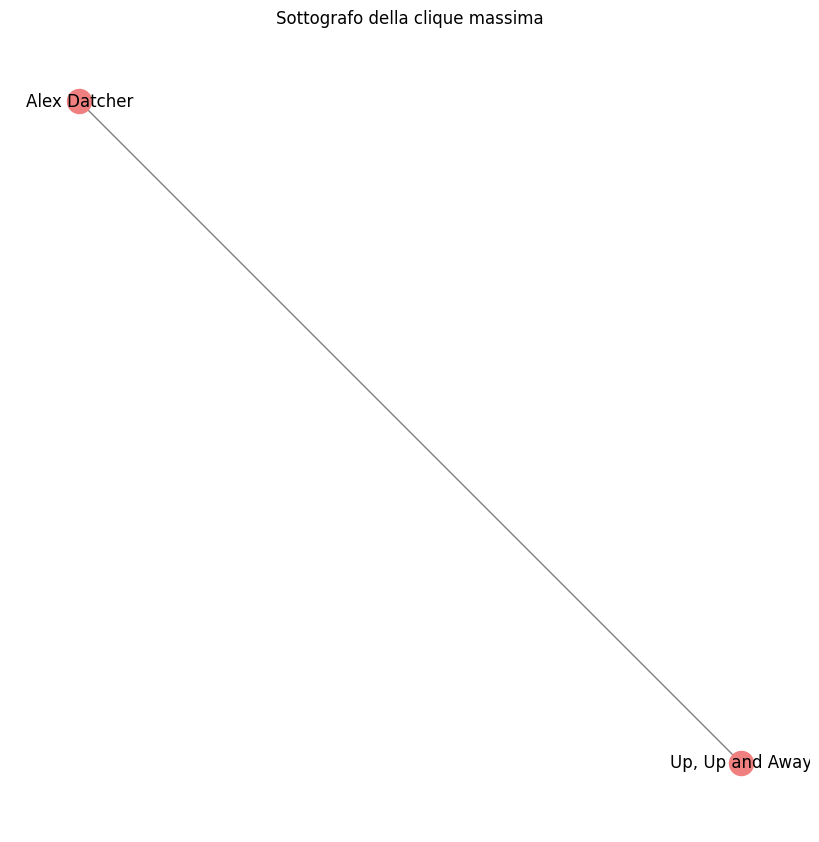

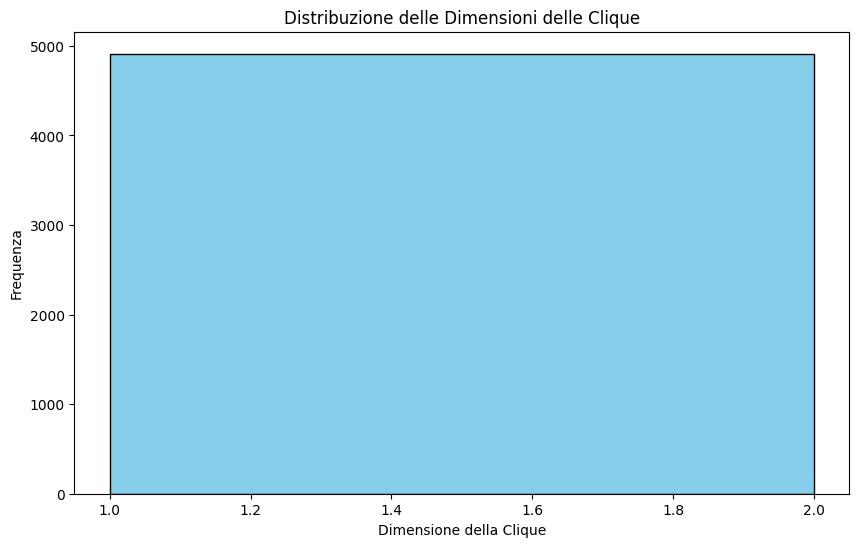

Densità del sottografo della clique massima: 1.0000


In [46]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# Conta il numero totale di triadi
def count_triad_types(G):
    triad_types = {
        'closed': 0,   # Tutte e tre le connessioni esistono
        'open': 0      # Almeno una connessione mancante
    }
    
    for node in G.nodes():
        # Prendi tutti i vicini del nodo
        neighbors = list(G.neighbors(node))
        
        # Controlla tutte le possibili combinazioni di 2 vicini
        for n1, n2 in itertools.combinations(neighbors, 2):
            if G.has_edge(n1, n2):
                triad_types['closed'] += 1
            else:
                triad_types['open'] += 1
    
    return triad_types

# Analisi delle triadi
triad_analysis = count_triad_types(G)
print("Analisi delle Triadi:")
print(f"Triadi chiuse: {triad_analysis['closed']}")
print(f"Triadi aperte: {triad_analysis['open']}")

# Calcolo del coefficiente di clustering medio
clustering_coefficient = nx.average_clustering(G)
print(f"Coefficiente di clustering medio: {clustering_coefficient:.4f}")

# Trova tutte le clique massimali nel grafo
all_cliques = list(nx.find_cliques(G))
print("\nAnalisi delle Clique:")
print(f"Numero totale di clique: {len(all_cliques)}")

# Determina la clique massima
largest_clique = max(all_cliques, key=len)
print(f"Dimensione della clique più grande: {len(largest_clique)}")
print("Primi 5 membri della clique più grande:", largest_clique[:5])

# Visualizza il sottografo della clique massima
G_clique = G.subgraph(largest_clique)

plt.figure(figsize=(8, 8))
nx.draw(G_clique, with_labels=True, node_color='lightcoral', edge_color='gray')
plt.title("Sottografo della clique massima")
plt.show()

# Distribuzione delle dimensioni delle clique
clique_sizes = [len(clique) for clique in all_cliques]
plt.figure(figsize=(10, 6))
plt.hist(clique_sizes, bins=range(1, max(clique_sizes)+1), color='skyblue', edgecolor='black')
plt.xlabel("Dimensione della Clique")
plt.ylabel("Frequenza")
plt.title("Distribuzione delle Dimensioni delle Clique")
plt.show()

# Calcolo della densità del sottografo della clique massima
clique_density = nx.density(G_clique)
print(f"Densità del sottografo della clique massima: {clique_density:.4f}")

**Cosa possiamo dedurre**
- Struttura della rete:
Il grafo è altamente frammentato e manca di cluster o comunità significative. È probabile che la rete rappresenti un insieme di connessioni isolate piuttosto che un sistema sociale o collaborativo coeso.

- Collaborazioni limitate:
L'assenza di clique grandi e il basso clustering indicano che i nodi tendono a interagire in modo più individuale piuttosto che formare gruppi coesi o collaborativi.

- Opportunità di ulteriori analisi:
Dato che il grafo presenta queste caratteristiche, potrebbe essere interessante esaminare le connessioni dei nodi con grado elevato (se presenti) o analizzare eventuali componenti connesse significative.
Potrebbe anche essere utile studiare come evolve la rete nel tempo per vedere se si formano nuove clique o comunità più connesse in epoche successive.

Esecuzione dell'analisi delle triadi e delle clique sulla componente connessa più grande.
Analisi delle Triadi:
Triadi chiuse: 0
Triadi aperte: 17594
Coefficiente di clustering medio: 0.0000

Analisi delle Clique:
Numero totale di clique: 4912
Dimensione della clique più grande: 2
Primi 5 membri della clique più grande: ['Alex Datcher', 'Up, Up and Away']


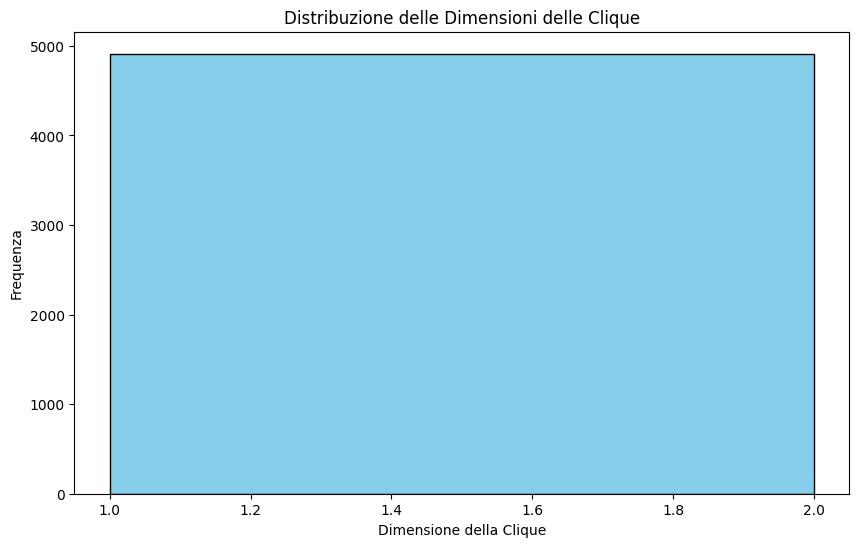

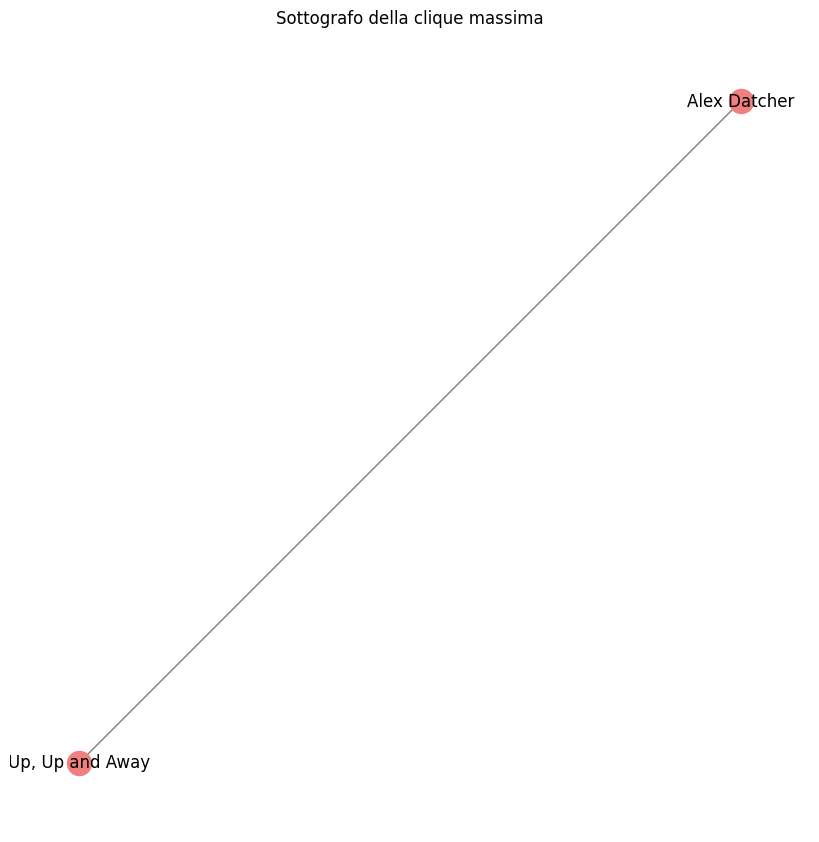


Top nodi per appartenenza a clique:
Nodo: Jim Cummings, Numero di clique: 33
Nodo: Walt Disney, Numero di clique: 20
Nodo: Larry the Cable Guy, Numero di clique: 19
Nodo: Bill Farmer, Numero di clique: 18
Nodo: Keith Ferguson, Numero di clique: 16
Nodo: Corey Burton, Numero di clique: 16
Nodo: Tress MacNeille, Numero di clique: 16
Nodo: Bob Peterson, Numero di clique: 15
Nodo: Pinto Colvig, Numero di clique: 15
Nodo: Jeff Bennett, Numero di clique: 15


In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Funzione per calcolare il coefficiente di clustering e le triadi
def analyze_triads_and_clustering(G):
    triad_types = {
        'closed': 0,  # Tutte e tre le connessioni esistono
        'open': 0     # Almeno una connessione mancante
    }

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        for n1, n2 in itertools.combinations(neighbors, 2):
            if G.has_edge(n1, n2):
                triad_types['closed'] += 1
            else:
                triad_types['open'] += 1

    clustering_coeff = nx.average_clustering(G)

    print("Analisi delle Triadi:")
    print(f"Triadi chiuse: {triad_types['closed']}")
    print(f"Triadi aperte: {triad_types['open']}")
    print(f"Coefficiente di clustering medio: {clustering_coeff:.4f}")

# Funzione per analizzare le clique
def analyze_cliques(G):
    all_cliques = list(nx.find_cliques(G))
    clique_sizes = [len(clique) for clique in all_cliques]
    
    largest_clique = max(all_cliques, key=len)
    
    print("\nAnalisi delle Clique:")
    print(f"Numero totale di clique: {len(all_cliques)}")
    print(f"Dimensione della clique più grande: {len(largest_clique)}")
    print(f"Primi 5 membri della clique più grande: {largest_clique[:5]}")

    # Visualizza la distribuzione delle dimensioni delle clique
    plt.figure(figsize=(10, 6))
    plt.hist(clique_sizes, bins=range(1, max(clique_sizes) + 1), color='skyblue', edgecolor='black')
    plt.title("Distribuzione delle Dimensioni delle Clique")
    plt.xlabel("Dimensione della Clique")
    plt.ylabel("Frequenza")
    plt.show()

    # Visualizza la clique massima come sottografo
    G_clique = G.subgraph(largest_clique)
    plt.figure(figsize=(8, 8))
    nx.draw(G_clique, with_labels=True, node_color='lightcoral', edge_color='gray')
    plt.title("Sottografo della clique massima")
    plt.show()

# Analisi specifica dei nodi coinvolti nelle clique
def analyze_nodes_in_cliques(G):
    all_cliques = list(nx.find_cliques(G))
    node_clique_count = Counter()

    for clique in all_cliques:
        for node in clique:
            node_clique_count[node] += 1

    # I 10 nodi che appartengono al maggior numero di clique
    top_nodes = node_clique_count.most_common(10)
    print("\nTop nodi per appartenenza a clique:")
    for node, count in top_nodes:
        print(f"Nodo: {node}, Numero di clique: {count}")

    return node_clique_count

# Applica le funzioni di analisi sulla componente connessa più grande
if __name__ == "__main__":
    # Supponendo che il grafo G sia già definito e rappresenti la componente connessa più grande
    print("Esecuzione dell'analisi delle triadi e delle clique sulla componente connessa più grande.")

    # Analisi delle triadi e clustering
    analyze_triads_and_clustering(G)

    # Analisi delle clique
    analyze_cliques(G)

    # Analisi dei nodi nelle clique
    node_clique_count = analyze_nodes_in_cliques(G)


Dal risultato dell'analisi delle triadi e delle clique, possiamo dedurre le seguenti osservazioni:

### Triadi:
1. **Triadi chiuse e aperte**:
   - Non ci sono triadi chiuse nella componente connessa più grande. Questo indica una rete priva di relazioni fortemente interconnesse e che tende a svilupparsi linearmente o con connessioni a stella.
   - La maggior parte delle triadi sono aperte (17.594), il che suggerisce una struttura che non favorisce la formazione di piccoli gruppi strettamente connessi.

2. **Coefficiente di clustering medio**:
   - Il coefficiente di clustering medio è 0, il che conferma la mancanza di connessioni triangolari o di densità locale nella rete. Questo è indicativo di una rete frammentata o con una struttura gerarchica più aperta.

---

### Clique:
1. **Dimensione delle clique**:
   - La dimensione massima delle clique è 2, il che implica che tutte le connessioni nella rete sono semplici legami binari (dyadi), senza strutture più complesse. Questo è coerente con la mancanza di triadi chiuse.

2. **Numero totale di clique**:
   - Esistono 4.912 clique nella rete. Tuttavia, dato che ogni clique è di dimensione 2, queste rappresentano semplicemente le connessioni dirette tra nodi.

3. **Top nodi per appartenenza a clique**:
   - I nodi come **Jim Cummings**, **Walt Disney**, e **Larry the Cable Guy** hanno la massima appartenenza alle clique. Questo significa che questi nodi sono altamente connessi nella rete e formano numerosi legami diretti con altri nodi.
   - **Jim Cummings**, in particolare, è il nodo più centrale rispetto all'appartenenza a clique (33 clique), confermando il suo ruolo dominante come nodo altamente connesso.

---

### Implicazioni e conclusioni:
1. **Struttura della rete**:
   - La rete mostra una struttura scarsamente densa e priva di gruppi fortemente interconnessi (triadi chiuse o clique maggiori di 2). Questo potrebbe essere spiegato dalla natura della rete stessa (ad esempio, una rete di attori e film con collegamenti limitati).

2. **Nodi centrali**:
   - Nodi come **Jim Cummings** e **Walt Disney** fungono da hub nella rete, collegando un gran numero di altri nodi. Questi attori possono essere considerati elementi chiave della rete per il loro elevato numero di connessioni.

3. **Opportunità di ulteriori analisi**: 
   - Esplorare il **k-core decomposition** per individuare sottogruppi di nodi con connessioni più dense potrebbe fornire ulteriori dettagli sulla struttura della rete.

## ORA EFFETTUO IL K-CORE PER ANALIZZARE MEGLIO IL TUTTO ⬇️

## K-CORE

Main K-Core Details:
Number of nodes: 26
K-value: 10


/var/folders/52/6kvtzffx1yqcl9zbzs1qy8lr0000gn/T/ipykernel_9394/1399876322.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


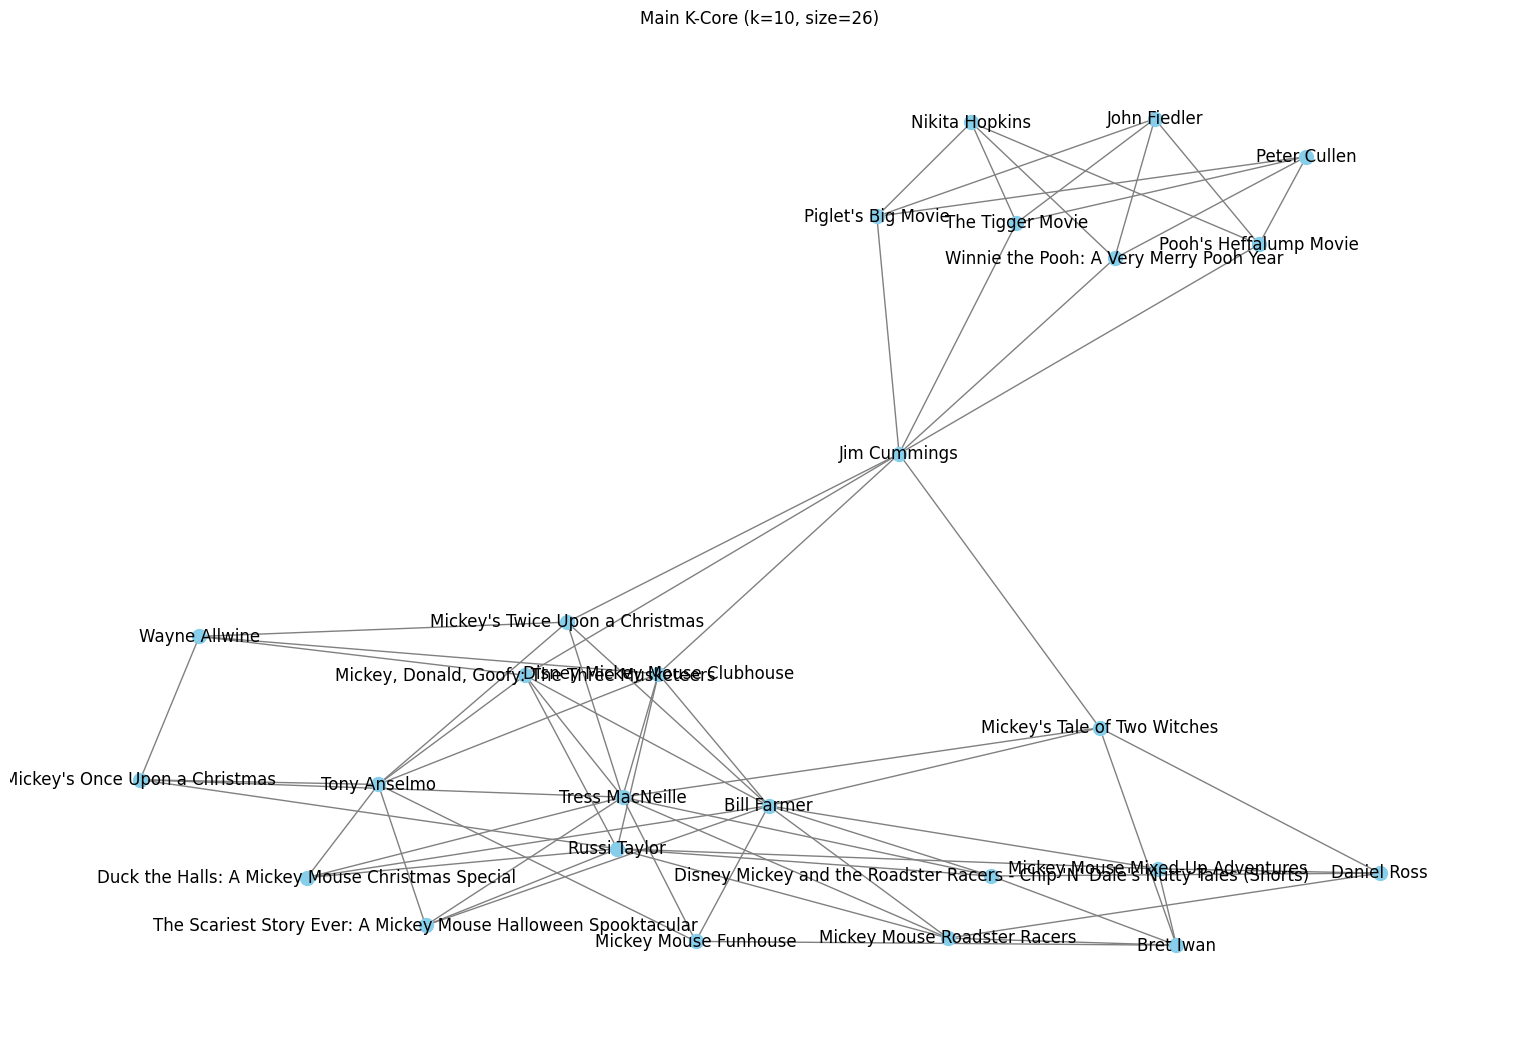

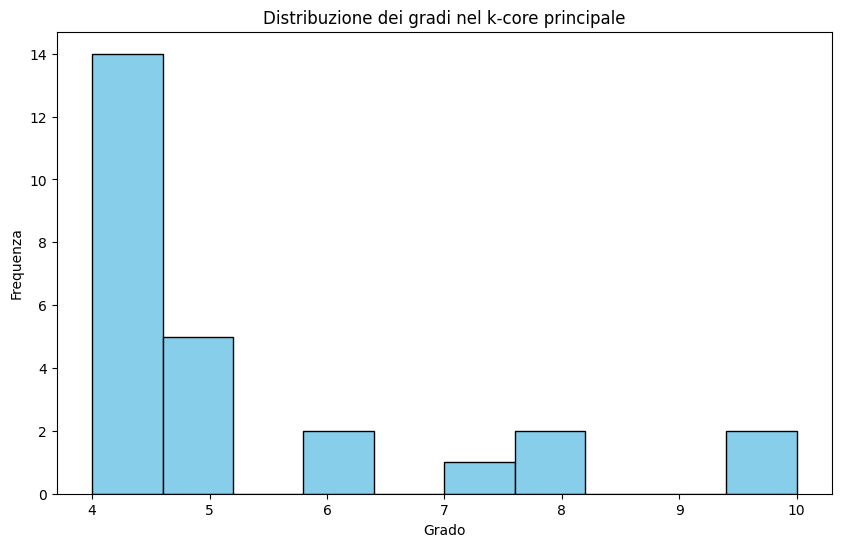

Nodo con grado massimo: ('Bill Farmer', 10)
Nodo con grado minimo: ('John Fiedler', 4)
Densità del k-core principale: 0.2092
Top 5 nodi per centralità di degree: [('Bill Farmer', 0.4), ('Tress MacNeille', 0.4), ('Russi Taylor', 0.32), ('Jim Cummings', 0.32), ('Tony Anselmo', 0.28)]
Top 5 nodi per centralità di betweenness: [('Jim Cummings', 0.4348330111156639), ('Bill Farmer', 0.14339297550923163), ('Tress MacNeille', 0.13669645125117164), ("Mickey's Tale of Two Witches", 0.12888177420313088), ('Disney Mickey Mouse Clubhouse', 0.11742710943475523)]
Top 5 nodi per centralità di closeness: [('Disney Mickey Mouse Clubhouse', 0.5102040816326531), ('Jim Cummings', 0.5102040816326531), ('Mickey, Donald, Goofy: The Three Musketeers', 0.5102040816326531), ('Bill Farmer', 0.49019607843137253), ("Mickey's Twice Upon a Christmas", 0.49019607843137253)]
Numero totale di clique nel k-core principale: 68
Dimensione della clique più grande: 2
Nodi della clique più grande: ['John Fiedler', 'Winnie the

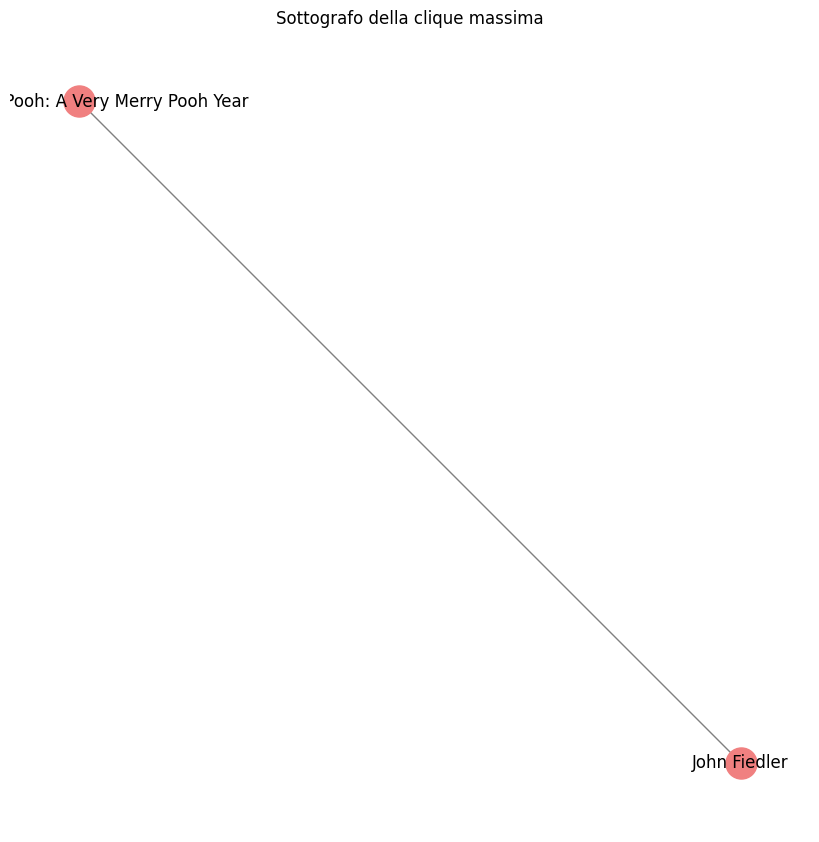

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# Esegui la decomposizione in k-core
def analyze_k_core(G):
    # Identifica il k-core principale
    k_cores = nx.k_core(G)

    # Trova la componente connessa più grande del k-core principale
    largest_k_core_cc = max(nx.connected_components(k_cores), key=len)
    main_core = k_cores.subgraph(largest_k_core_cc).copy()

    # Parametri principali
    main_core_size = len(main_core.nodes())
    k_value = max(dict(main_core.degree()).values())

    print(f"Main K-Core Details:")
    print(f"Number of nodes: {main_core_size}")
    print(f"K-value: {k_value}")

    # Visualizzazione del k-core principale
    def plot_k_core(G):
        pos = nx.spring_layout(G, seed=42)

        plt.figure(figsize=(15, 10))
        nx.draw(G, pos, node_size=100, edge_color='gray', with_labels=True, node_color='skyblue')
        plt.title(f"Main K-Core (k={k_value}, size={main_core_size})")
        plt.tight_layout()
        plt.show()

    plot_k_core(main_core)

    # Distribuzione del grado
    def plot_degree_distribution(G):
        degrees = [G.degree(n) for n in G.nodes()]
        plt.figure(figsize=(10, 6))
        plt.hist(degrees, bins=10, color='skyblue', edgecolor='black')
        plt.title("Distribuzione dei gradi nel k-core principale")
        plt.xlabel("Grado")
        plt.ylabel("Frequenza")
        plt.show()

        max_degree_node = max(G.degree, key=lambda x: x[1])
        min_degree_node = min(G.degree, key=lambda x: x[1])
        print(f"Nodo con grado massimo: {max_degree_node}")
        print(f"Nodo con grado minimo: {min_degree_node}")

    plot_degree_distribution(main_core)

    # Densità del k-core
    density = nx.density(main_core)
    print(f"Densità del k-core principale: {density:.4f}")

    # Centralità dei nodi
    def compute_centrality_measures(G):
        degree_centrality = nx.degree_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)

        top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
        top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
        top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

        print("Top 5 nodi per centralità di degree:", top_degree)
        print("Top 5 nodi per centralità di betweenness:", top_betweenness)
        print("Top 5 nodi per centralità di closeness:", top_closeness)

    compute_centrality_measures(main_core)

    # Analisi delle clique
    def analyze_cliques(G):
        cliques = list(nx.find_cliques(G))
        largest_clique = max(cliques, key=len)

        print(f"Numero totale di clique nel k-core principale: {len(cliques)}")
        print(f"Dimensione della clique più grande: {len(largest_clique)}")
        print("Nodi della clique più grande:", largest_clique)

        # Visualizza la clique massima
        G_clique = G.subgraph(largest_clique)
        plt.figure(figsize=(8, 8))
        nx.draw(G_clique, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=500)
        plt.title("Sottografo della clique massima")
        plt.show()

    analyze_cliques(main_core)

# Supponiamo che G sia già stato definito come il grafo principale
# Sostituisci con il tuo grafo
# Esegui l'analisi completa del k-core
analyze_k_core(G)


**Alcune deduzioni e proposte per il confronto e l'interpretazione:**

### 1. **Conferma dei risultati precedenti**
   - **Nodi centrali**: Dal k-core emergono nodi come Jim Cummings, Bill Farmer e Tress MacNeille con alti valori di centralità. Questi nodi erano già stati individuati come importanti nelle analisi precedenti (es. centralità di degree, betweenness).
   - **Cliques**: La dimensione della clique massima (2) e il numero totale di clique (68) nel k-core principale sono coerenti con la scarsa densità della rete complessiva emersa nell'analisi globale. 

### 2. **Nuove prospettive**
   - **Densità del k-core**: La densità del k-core principale (0.2092) indica che, pur essendo una sottorete ristretta ai nodi più "forti", i collegamenti restano relativamente bassi. Questo potrebbe suggerire che anche tra i nodi chiave non c'è una forte interconnessione globale.
   - **Distribuzione dei gradi**: La distribuzione dei gradi nel k-core (con un massimo di 10 e un minimo di 4) conferma che il k-core isola i nodi con connessioni robuste, escludendo quelli periferici.
   - **Centralità specifica**: La centralità di closeness mostra che nodi come "Disney Mickey Mouse Clubhouse" e "Jim Cummings" hanno una maggiore prossimità al resto del k-core. Questo potrebbe indicare che, pur avendo gradi simili, alcuni nodi sono più centrali nella struttura del k-core.

### 3. **Confronto con le analisi precedenti**
   - **Ego network**: Le ego network di Jim Cummings e altri mostrano la posizione locale di questi nodi nel grafo globale, mentre il k-core aggiunge informazioni sulla loro rilevanza nella sottorete più robusta.
   - **Triadi e clique globali**: Nell'analisi globale, le clique erano più numerose (4912) rispetto al k-core, ma la dimensione massima era sempre molto bassa (2). Questo risultato è coerente con una rete complessivamente poco densa.
   - **Community detection**: Le community evidenziavano raggruppamenti tematici e basati su collaborazioni. Il k-core mostra che alcuni di questi nodi sono particolarmente rilevanti in una struttura più selettiva e robusta.

### 4. **Interpretazione e deduzioni**
   - Il k-core rappresenta una conferma della centralità di alcuni nodi chiave, ma sottolinea anche una limitata interconnessione tra di essi.
   - La struttura del grafo, anche nel suo nucleo principale, sembra frammentata e connessa principalmente attraverso pochi nodi centrali.
   - La presenza di clique di dimensione molto piccola riflette una rete basata su connessioni individuali piuttosto che su gruppi altamente connessi.

### 5. **Prossimi passi**
   - **Approfondimenti tematici**: Collegare i nodi chiave del k-core ai temi principali (es. "Animation", "Family") per vedere se ci sono sovrapposizioni significative.